In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Lectura del CSV

In [2]:
data = pd.read_csv('data.csv')

data

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                  ?                               ?   
1                                  ?                               ?   
2                                  ?                               ?   
3                                  ?                               ?   
4                                  ?                               ?   
..                               ...                             ...   
853                                ?                               ?   
854                                ?                               ?   
855                                ?                               ?   
856                                ?                               ?   
857                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

In [3]:
count_question_marks_per_column = data.map(lambda x: x == '?').sum()

print("Columnas con mas de 50 valores nulos")

for column, value in count_question_marks_per_column.items():
    if value < 50:
        print(f"{column}: {value}")

# print(count_question_marks_per_column)

Columnas con mas de 50 valores nulos
Age: 0
Number of sexual partners: 26
First sexual intercourse: 7
Smokes: 13
Smokes (years): 13
Smokes (packs/year): 13
STDs: Number of diagnosis: 0
Dx:Cancer: 0
Dx:CIN: 0
Dx:HPV: 0
Dx: 0
Hinselmann: 0
Schiller: 0
Citology: 0
Biopsy: 0


In [4]:
print("Columnas con mas de 450 valores nulos")

for column, value in count_question_marks_per_column.items():
    if value > 450:
        print(f"{column}: {value}")

Columnas con mas de 450 valores nulos
STDs: Time since first diagnosis: 787
STDs: Time since last diagnosis: 787


In [5]:
# Count missing values in each column
missing_values_count = data.isna().sum()

print(missing_values_count)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [6]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isna().sum()

print(missing_values_count)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Generación del análisis exploratorio

In [7]:
profile = ProfileReport(data, title="Exploración de datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Selección de variables numéricas, basándonos en la clasificación de cuantitativas y cualitativas

También reemplazamos todos los valores ? con un 0 para tener solo valores numéricos

In [8]:
numerical = data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]

for column in numerical.columns:
    numerical[column] = pd.to_numeric(numerical[column].replace('?', np.nan), errors='coerce')

# Rellenar NaN con la media de cada columna
for column in numerical:
    if column != 'STDs: Time since first diagnosis' and column != 'STDs: Time since last diagnosis':
        numerical[column] = numerical[column].fillna(numerical[column].mean())
    else:
        # Para estas columnas, si deseas reemplazar '?' por '0', primero asegúrate de que sean NaN
        numerical[column] = numerical[column].fillna(0).astype(int)

numerical = numerical.astype("float")
numerical

/tmp/ipykernel_48991/2460247486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[column] = pd.to_numeric(numerical[column].replace('?', np.nan), errors='coerce')
/tmp/ipykernel_48991/2460247486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[column] = numerical[column].fillna(numerical[column].mean())
/tmp/ipykernel_48991/2460247486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Age  Number of sexual partners  First sexual intercourse  \
0    18.0                        4.0                   15.0000   
1    15.0                        1.0                   14.0000   
2    34.0                        1.0                   16.9953   
3    52.0                        5.0                   16.0000   
4    46.0                        3.0                   21.0000   
..    ...                        ...                       ...   
853  34.0                        3.0                   18.0000   
854  32.0                        2.0                   19.0000   
855  25.0                        2.0                   17.0000   
856  33.0                        2.0                   24.0000   
857  29.0                        2.0                   20.0000   

     Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
0                   1.0             0.0                  0.0   
1                   1.0             0.0                  0.0   
2                   1.0             0.0                  0.0   
3                   4.0            37.0                 37.0   
4                   4.0             0.0                  0.0   
..                  ...             ...                  ...   
853                 0.0             0.0                  0.0   
854                 1.0             0.0                  0.0   
855                 0.0             0.0                  0.0   
856                 2.0             0.0                  0.0   
857                 1.0             0.0                  0.0   

     Hormonal Contraceptives (years)  IUD (years)  STDs (number)  \
0                               0.00          0.0            0.0   
1                               0.00          0.0            0.0   
2                               0.00          0.0            0.0   
3                               3.00          0.0            0.0   
4                              15.00          0.0            0.0   
..                               ...          ...            ...   
853                             0.00          0.0            0.0   
854                             8.00          0.0            0.0   
855                             0.08          0.0            0.0   
856                             0.08          0.0            0.0   
857                             0.50          0.0            0.0   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   
..                         ...                               ...   
853                        0.0                               0.0   
854                        0.0                               0.0   
855                        0.0                               0.0   
856                        0.0                               0.0   
857                        0.0                               0.0   

     STDs: Time since last diagnosis  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
..                               ...  
853                              0.0  
854                              0.0  
855                              0.0  
856                              0.0  
857                              0.0  

[858 rows x 12 columns]

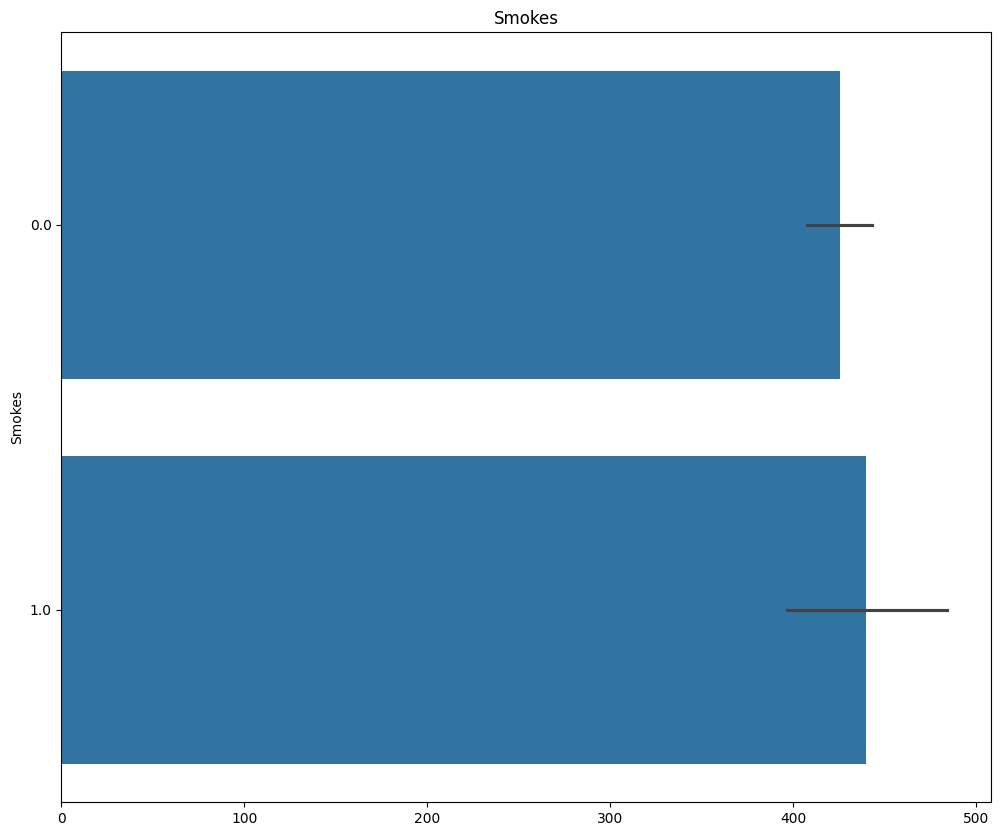

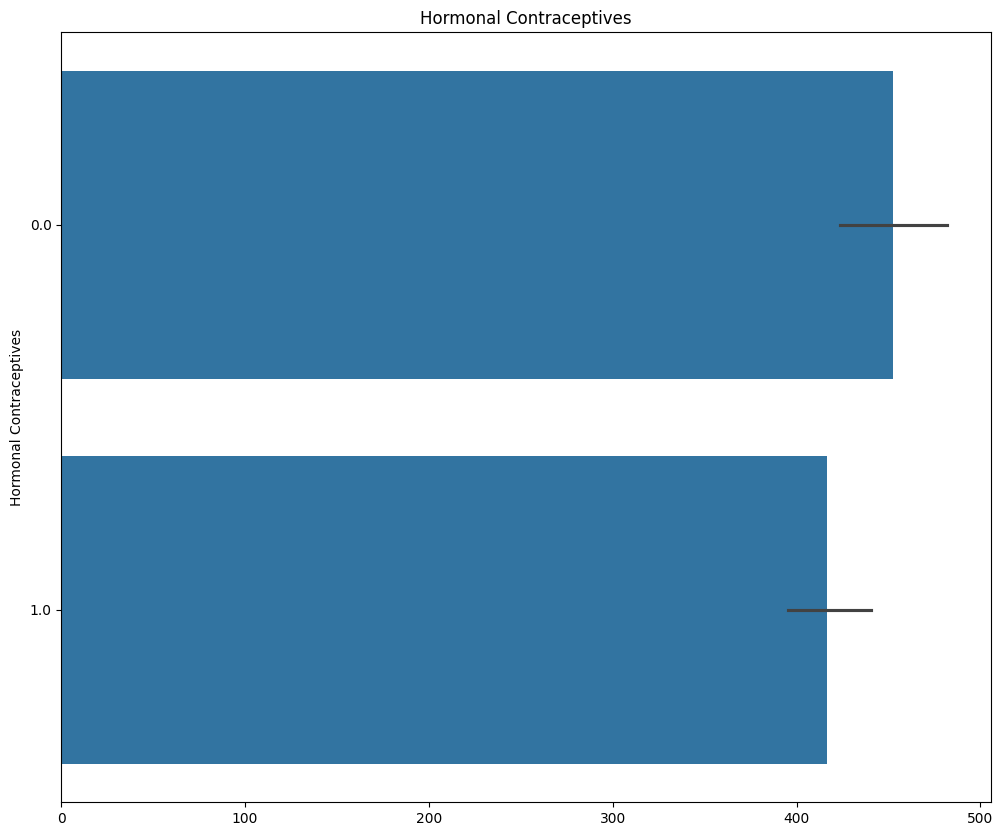

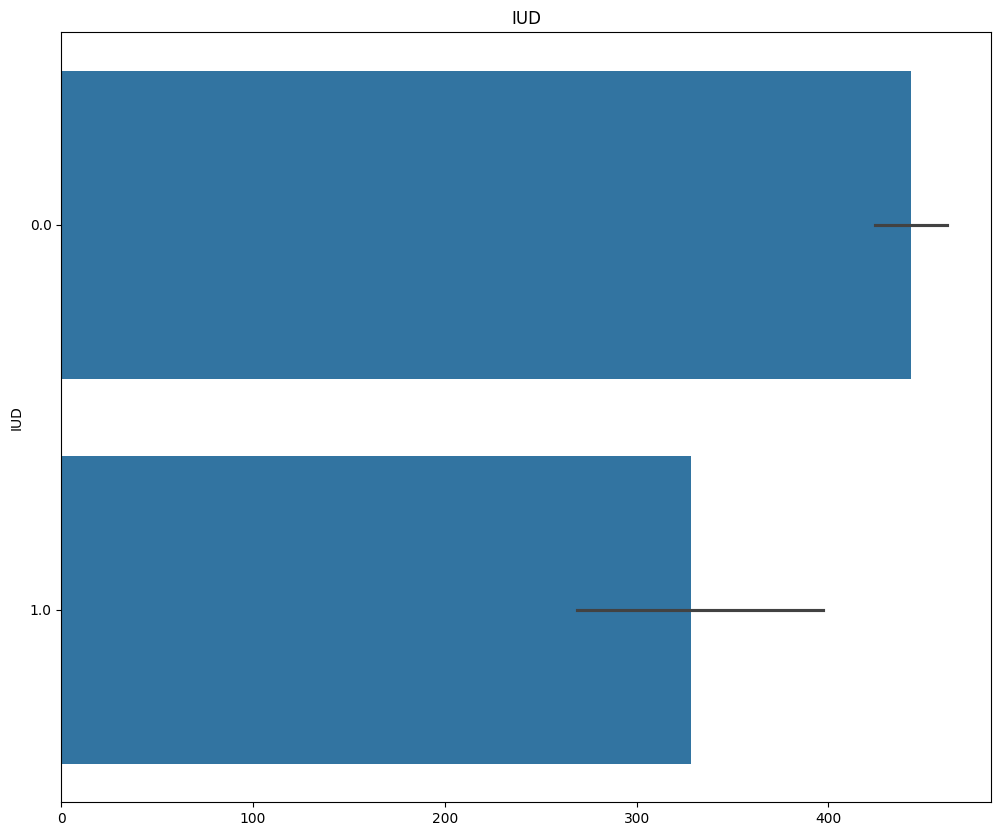

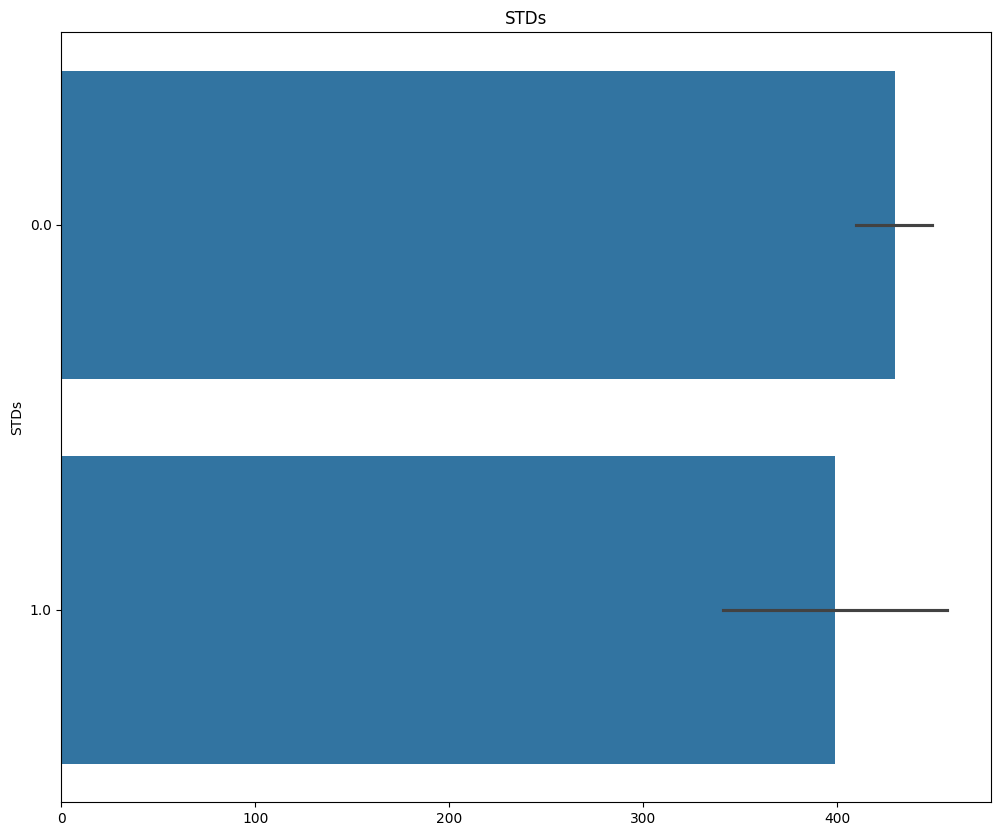

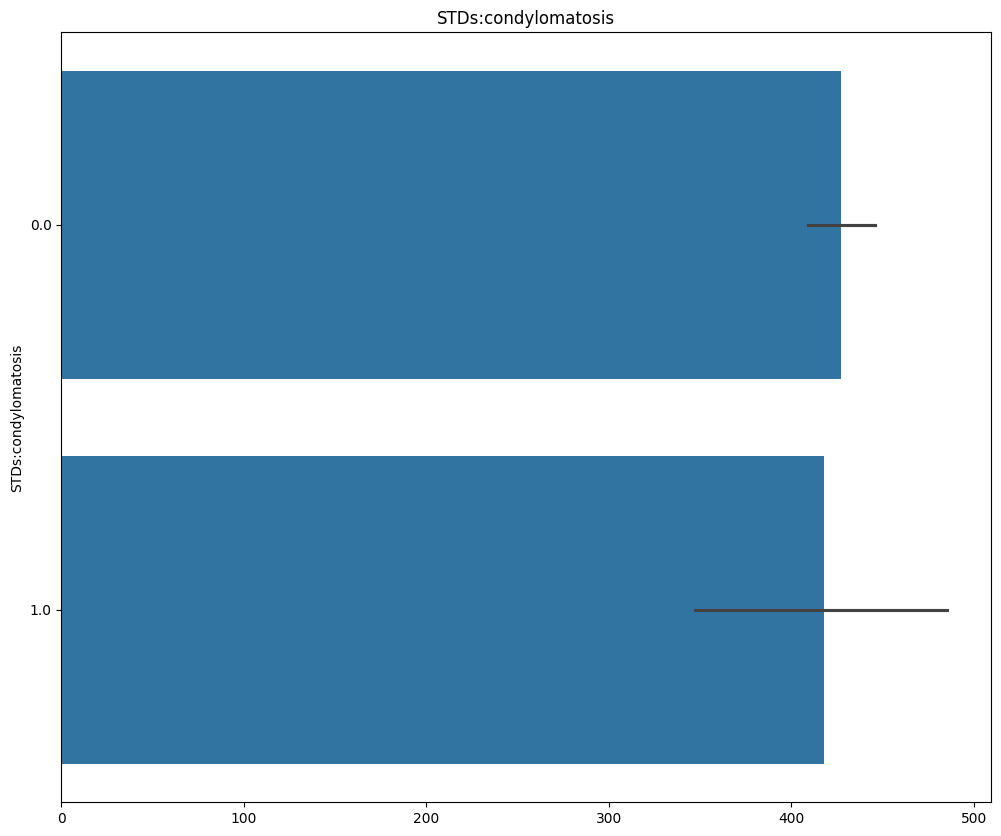

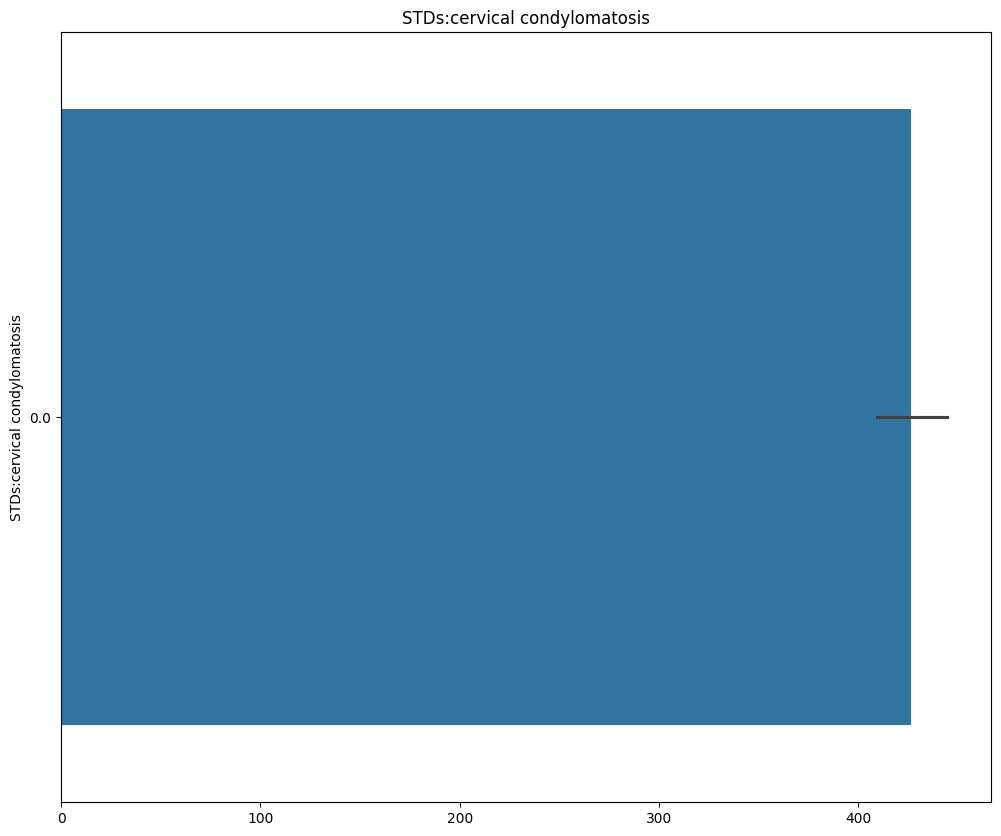

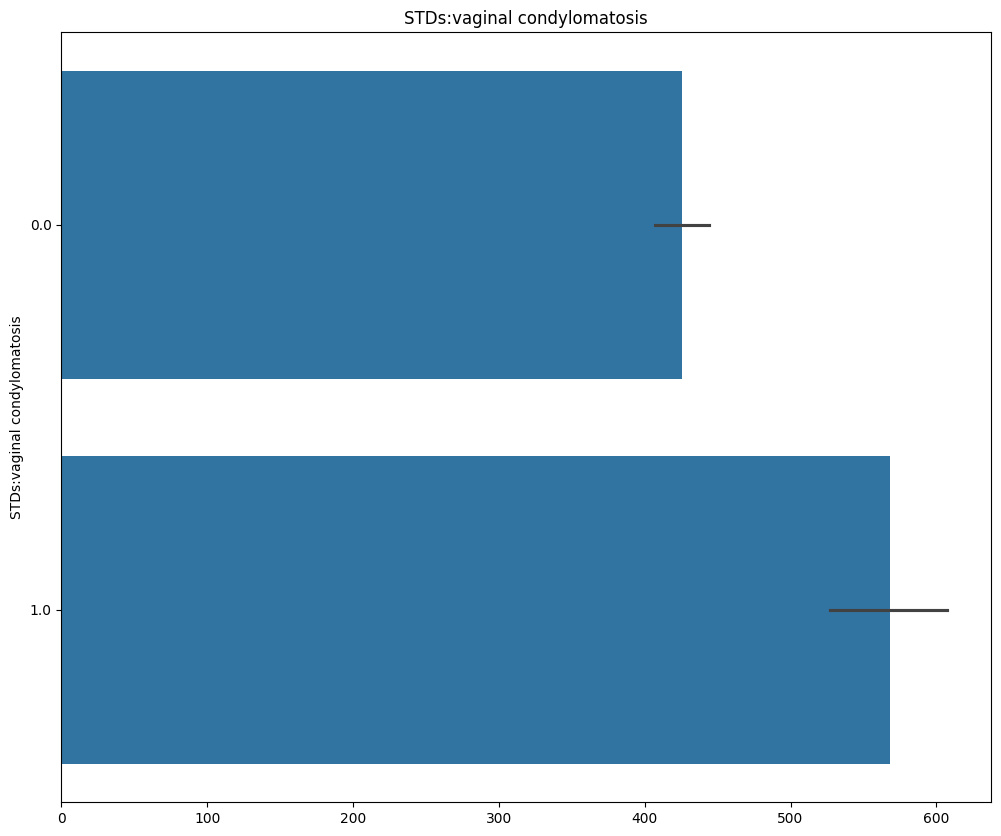

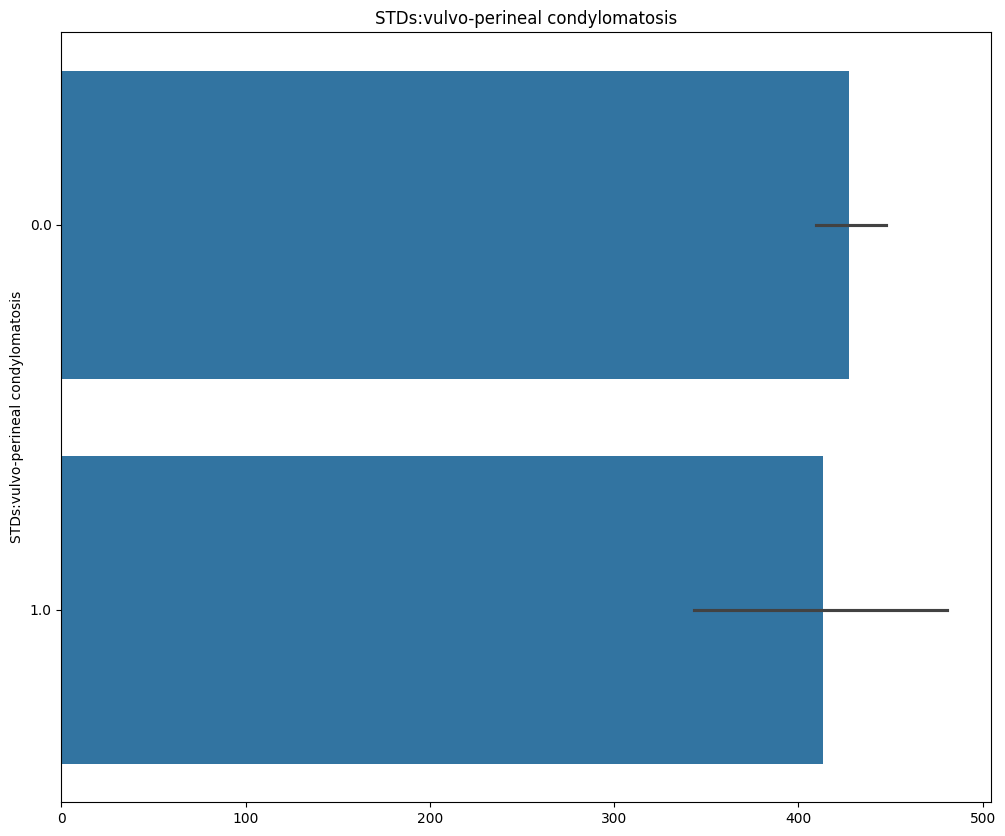

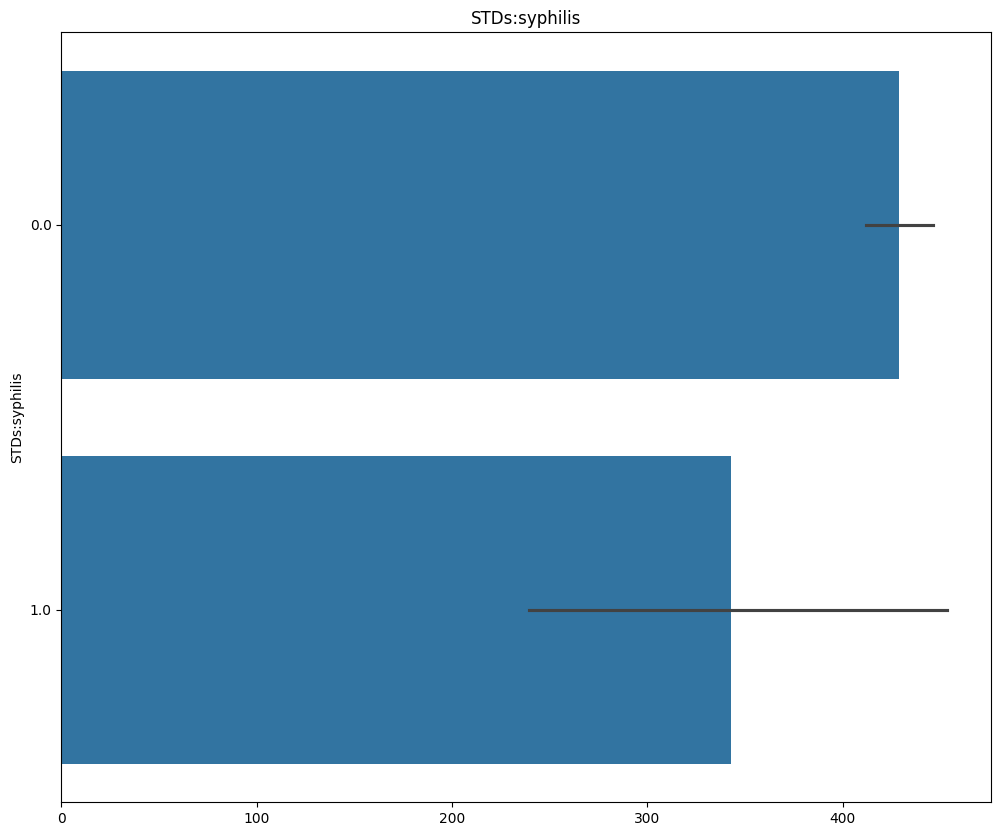

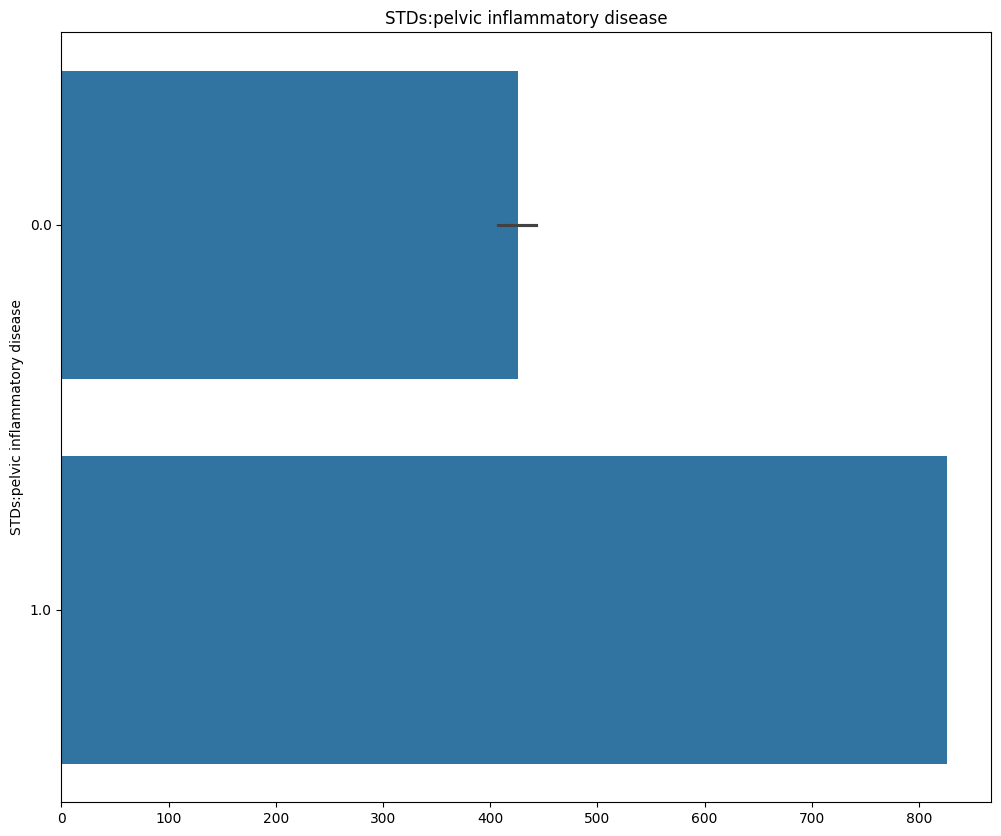

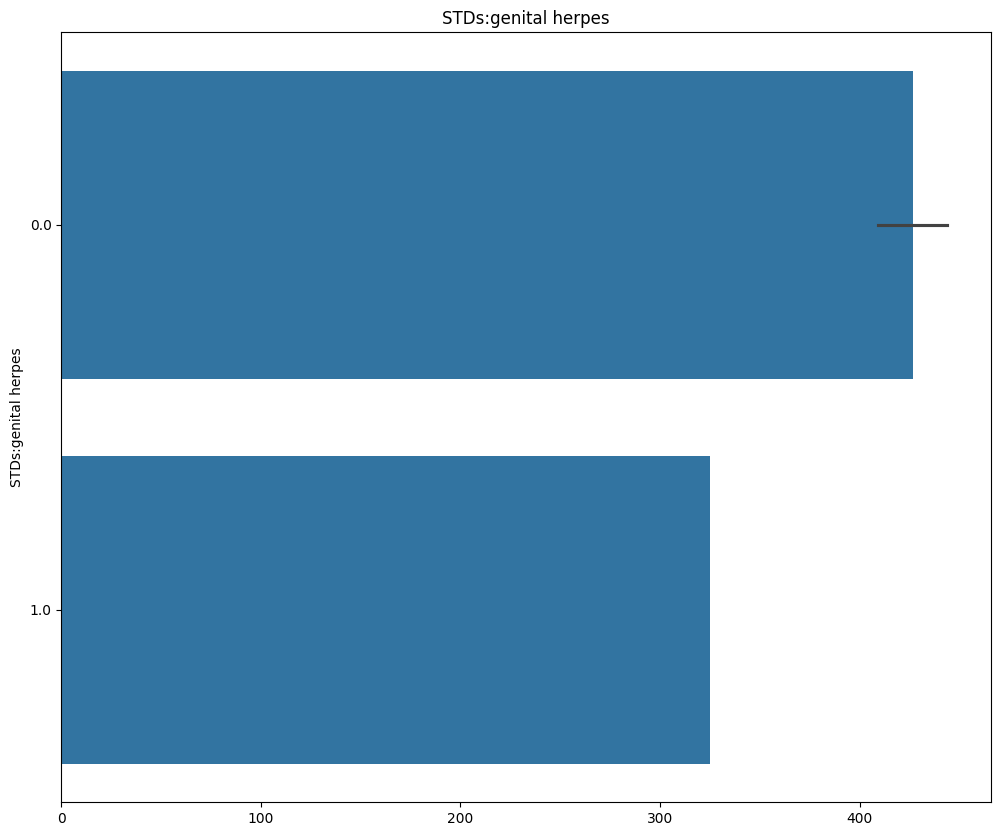

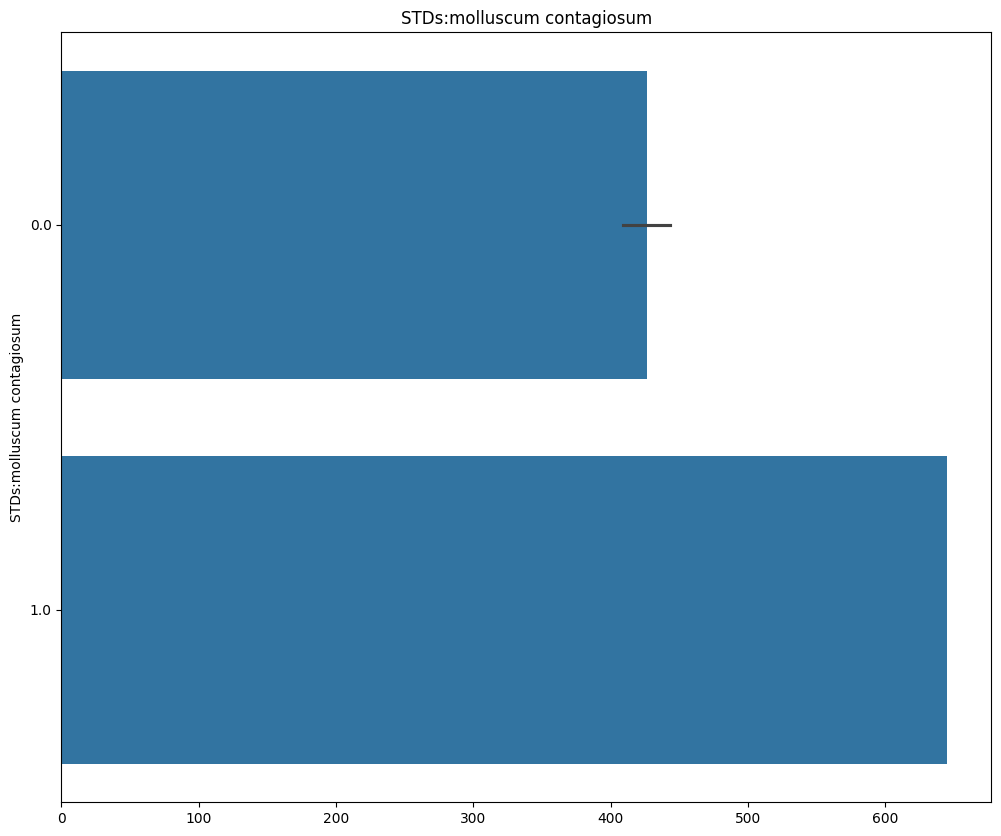

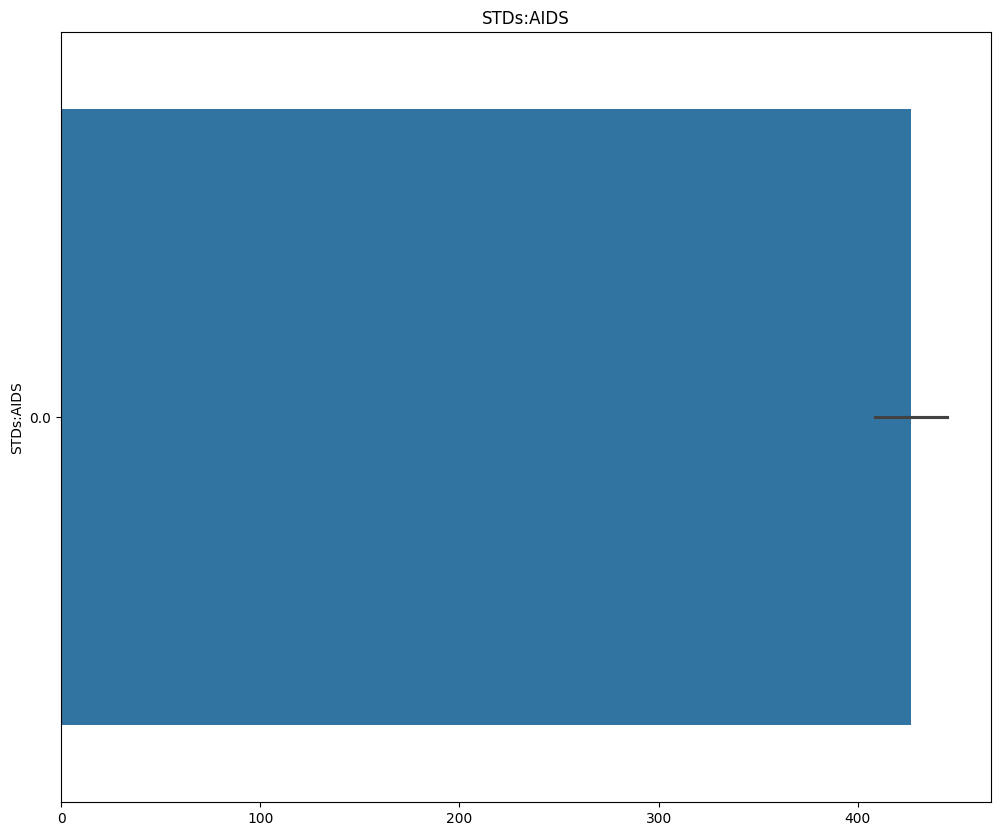

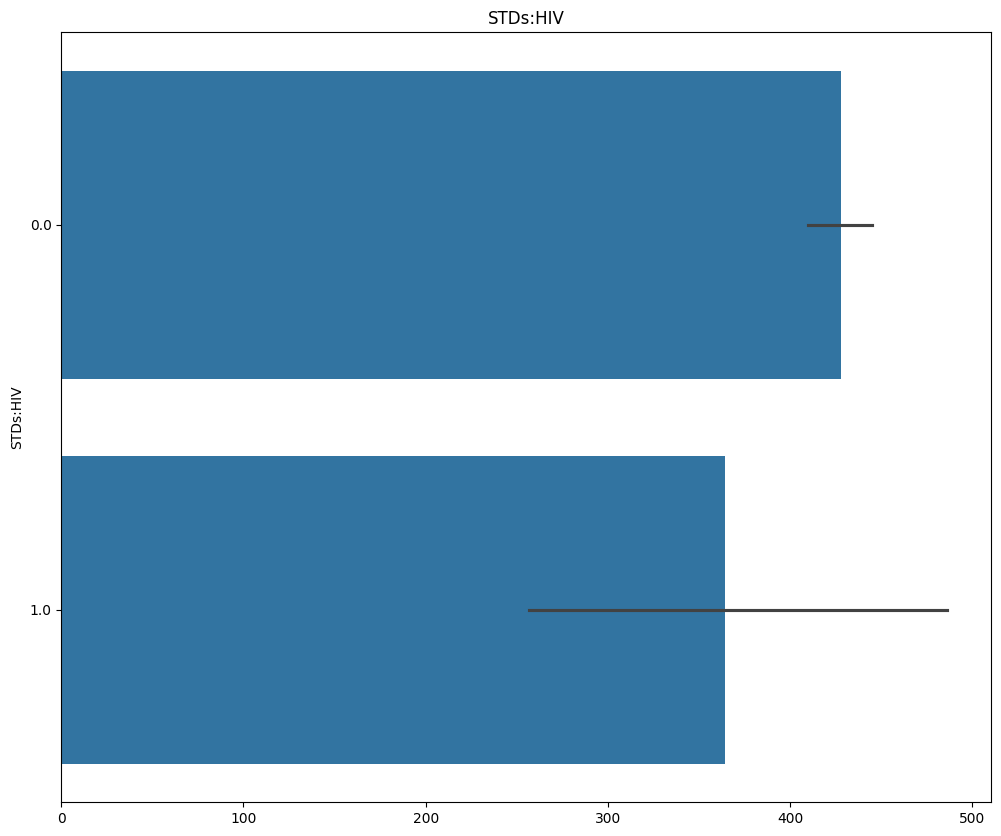

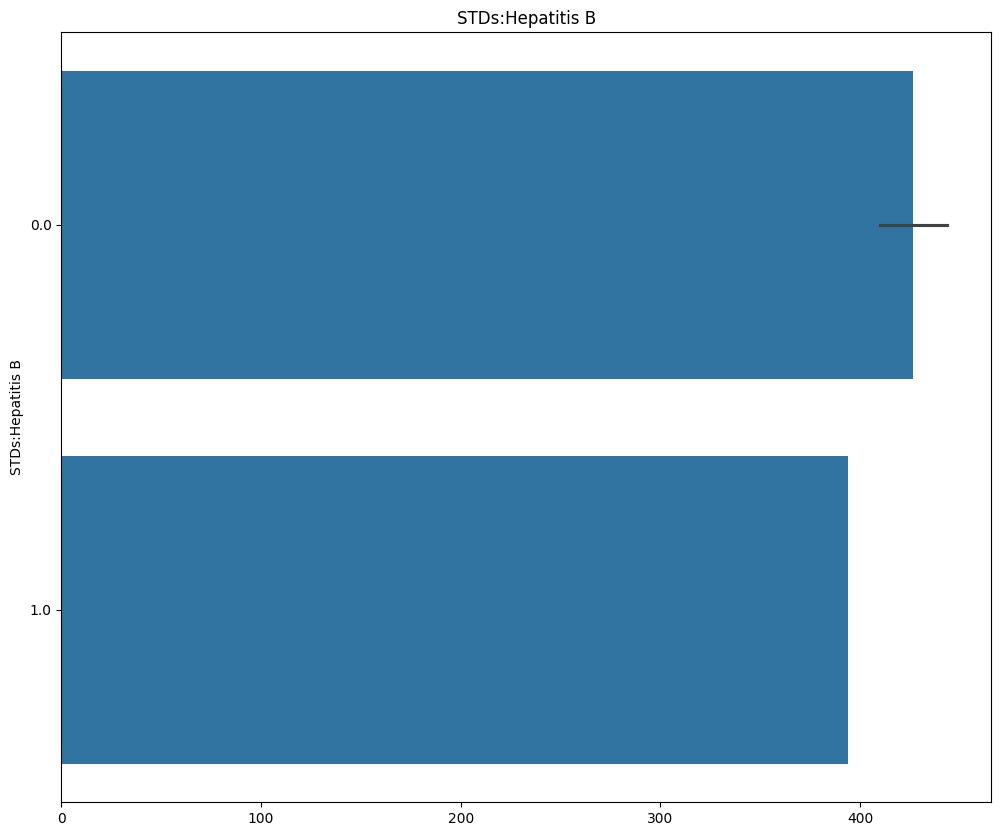

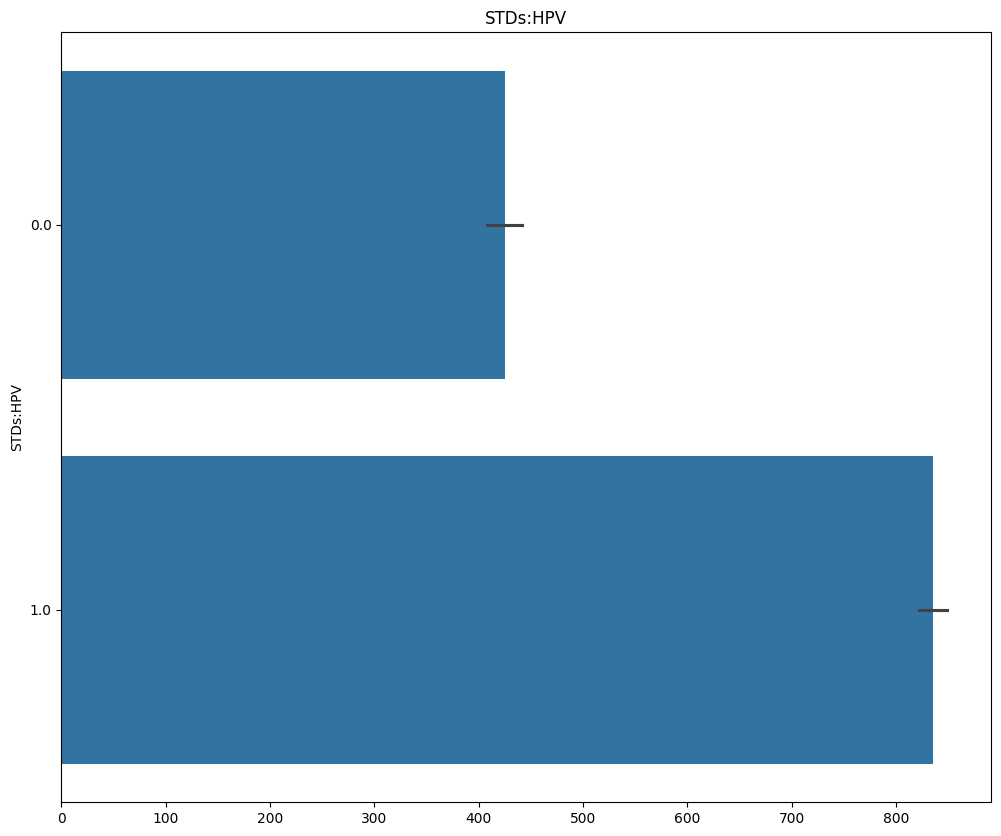

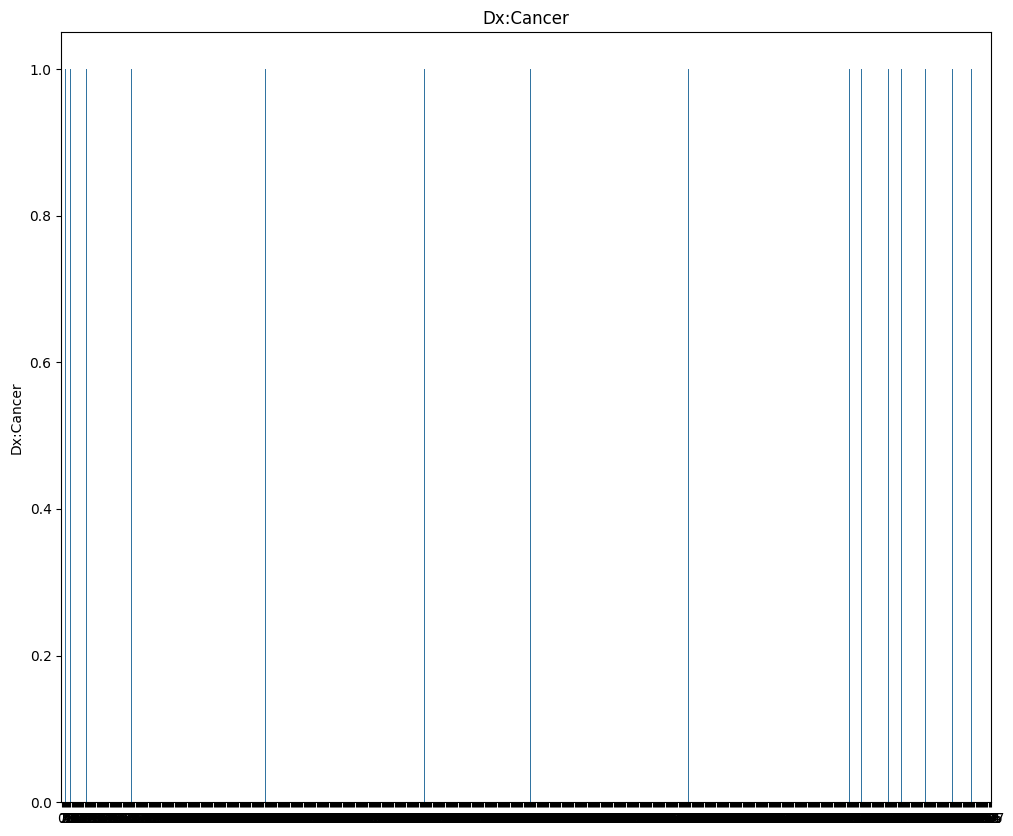

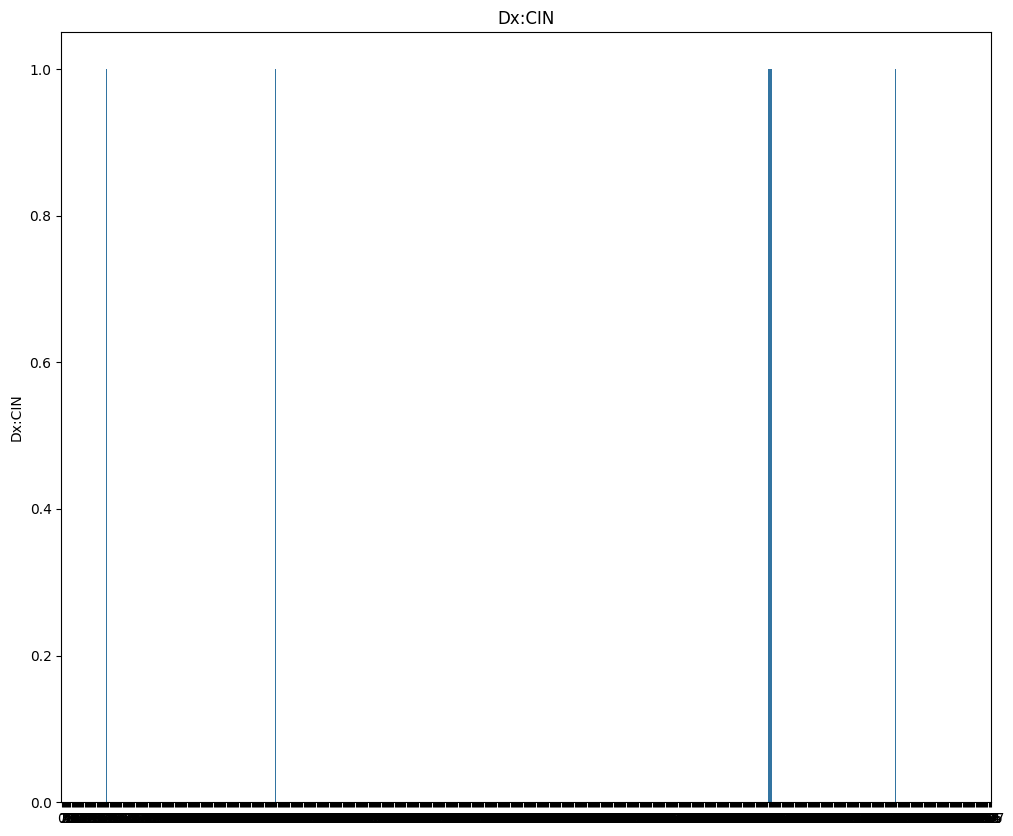

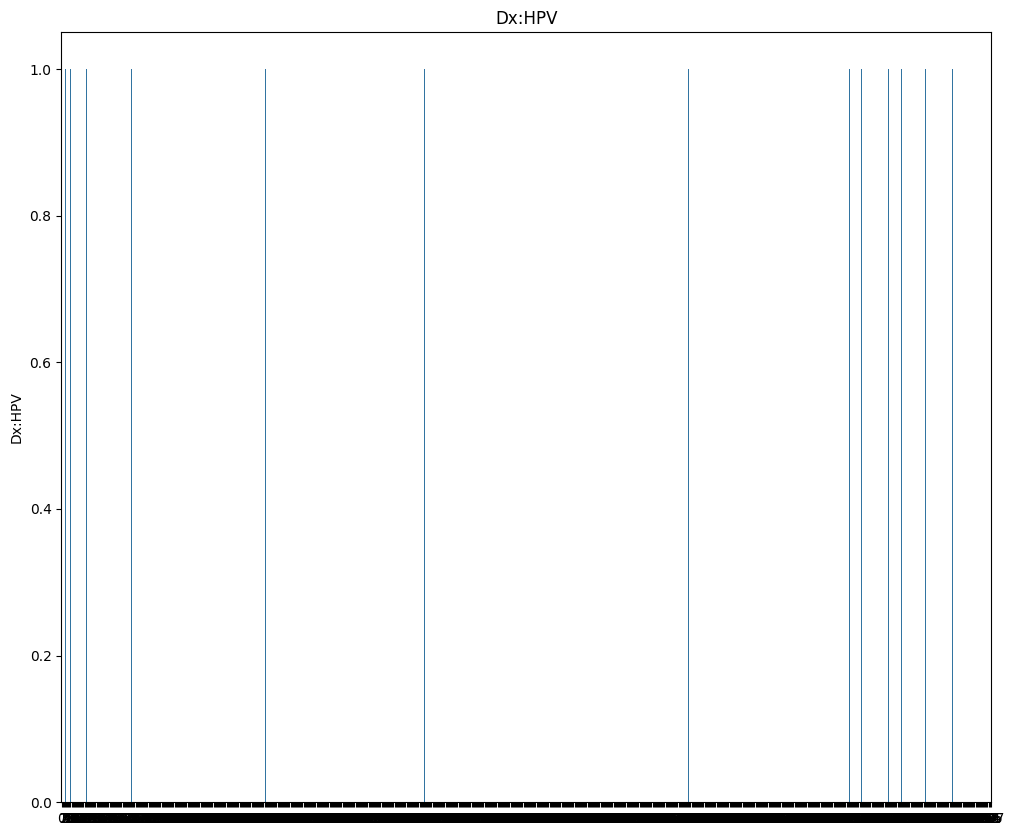

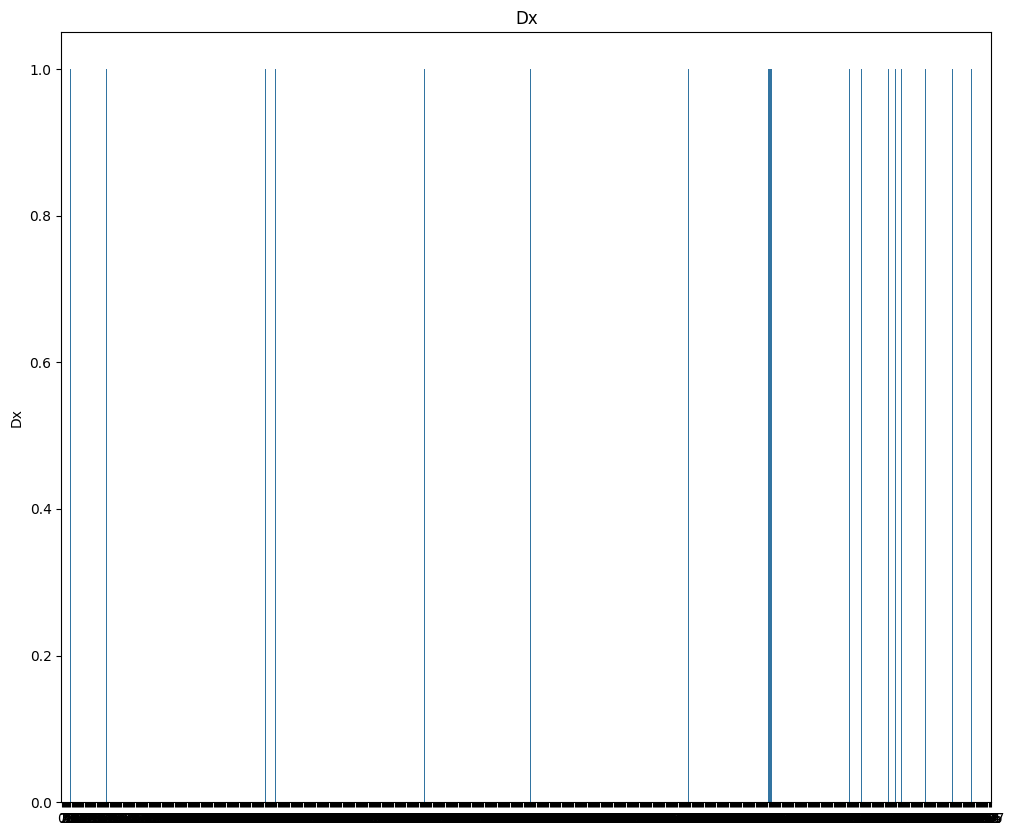

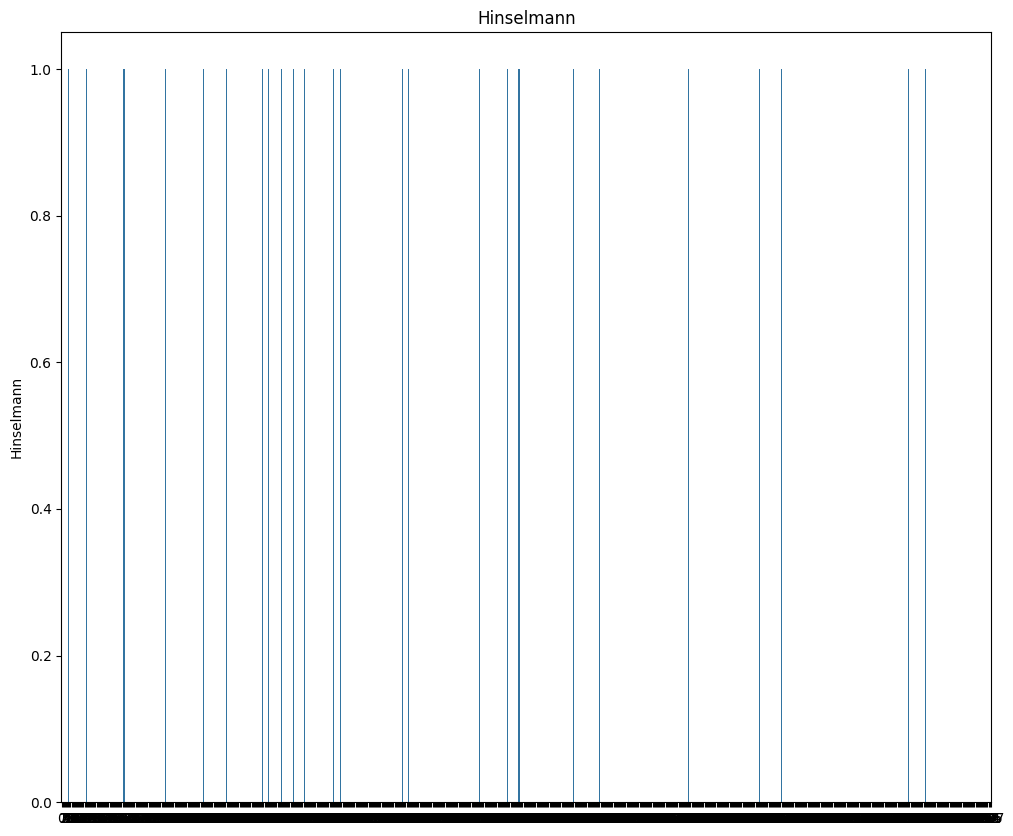

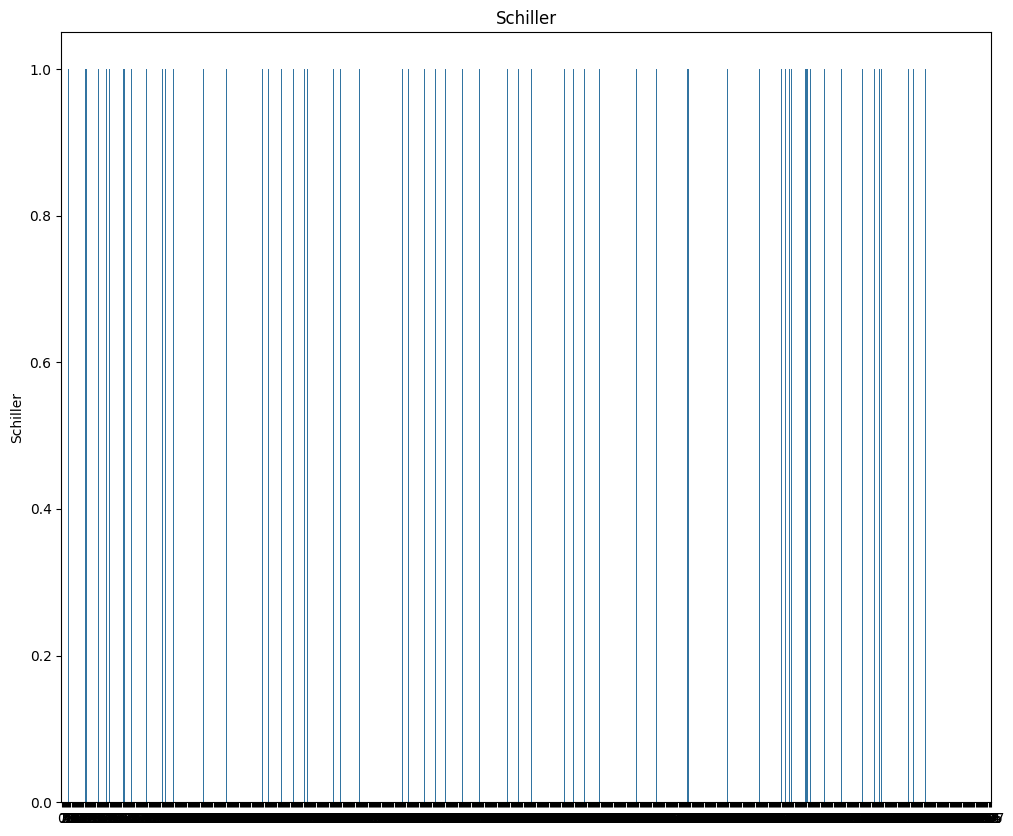

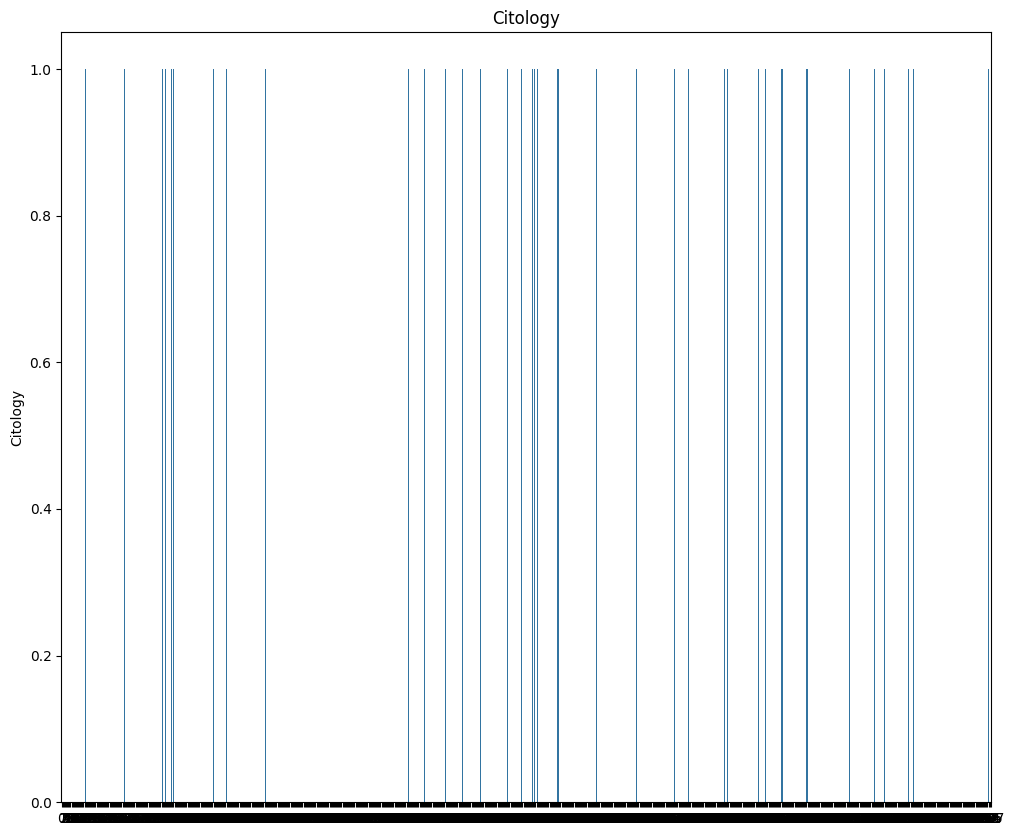

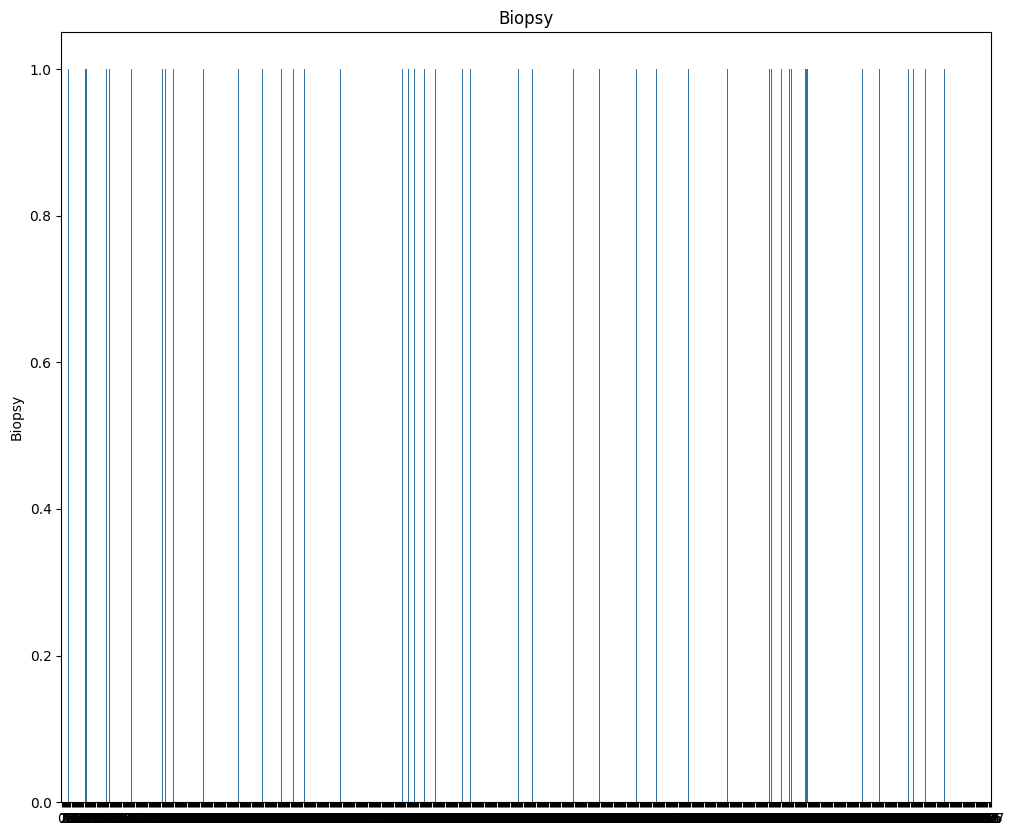

In [9]:
categorical = data[[col for col in data.columns if col not in numerical.columns]]
for column in categorical:
    plt.figure(figsize=(12,10))
    sb.barplot(data=categorical[column])
    plt.title(column)
    plt.show()


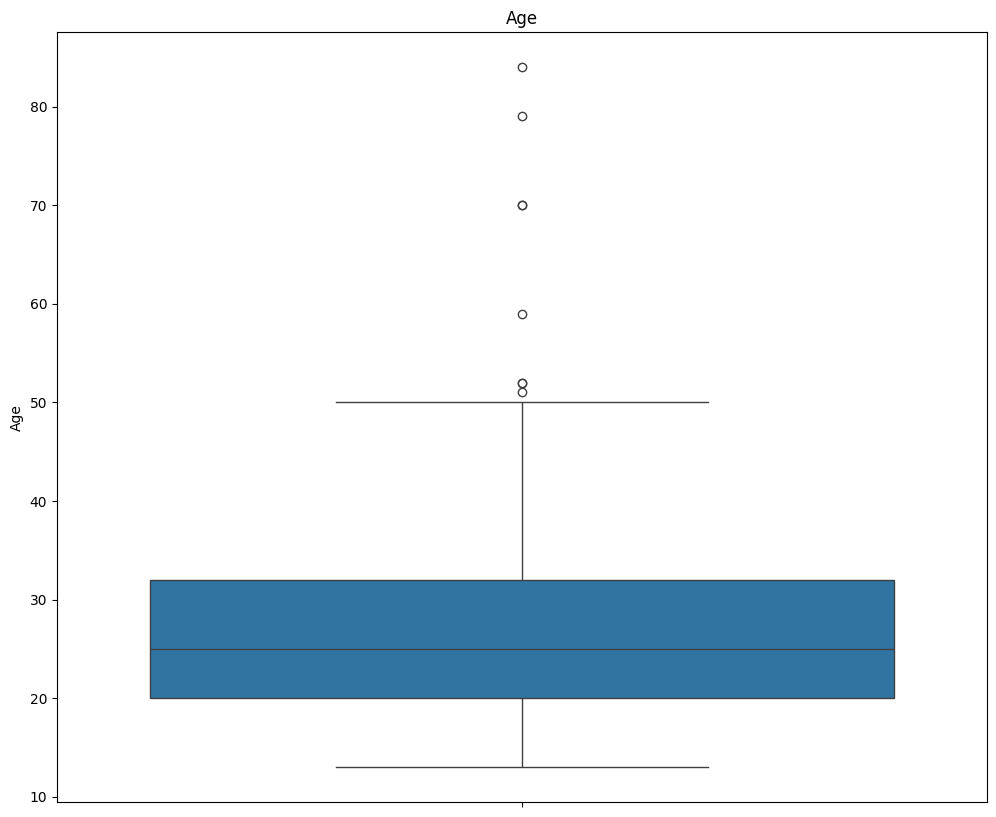

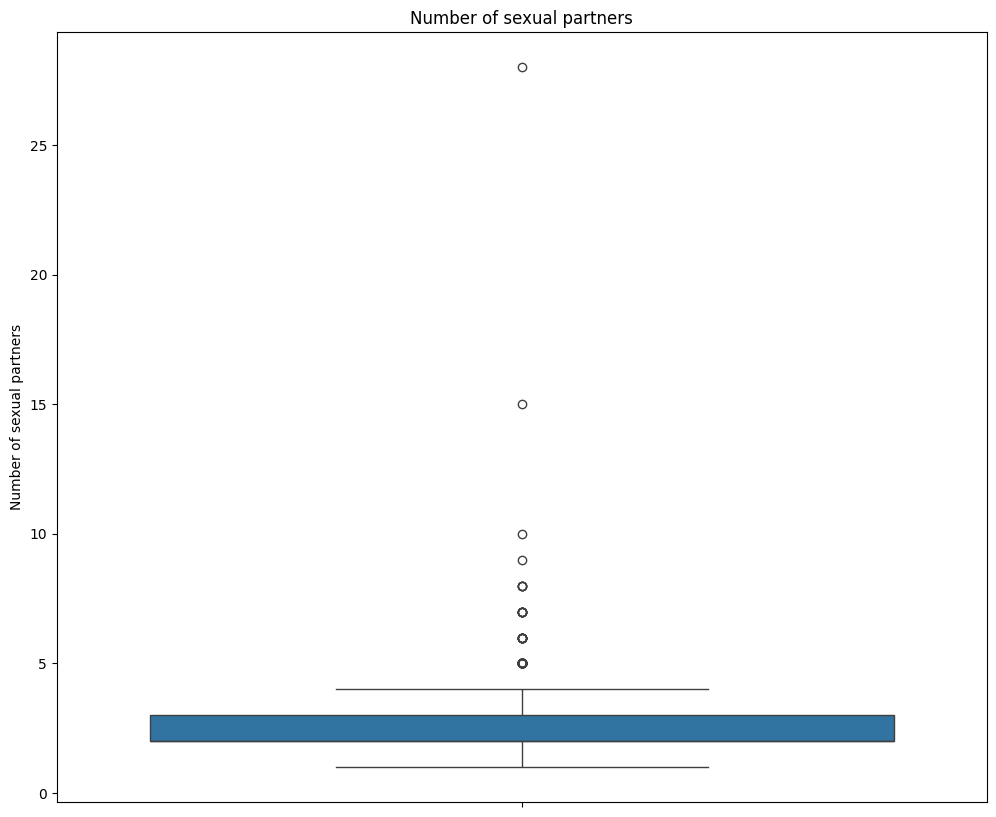

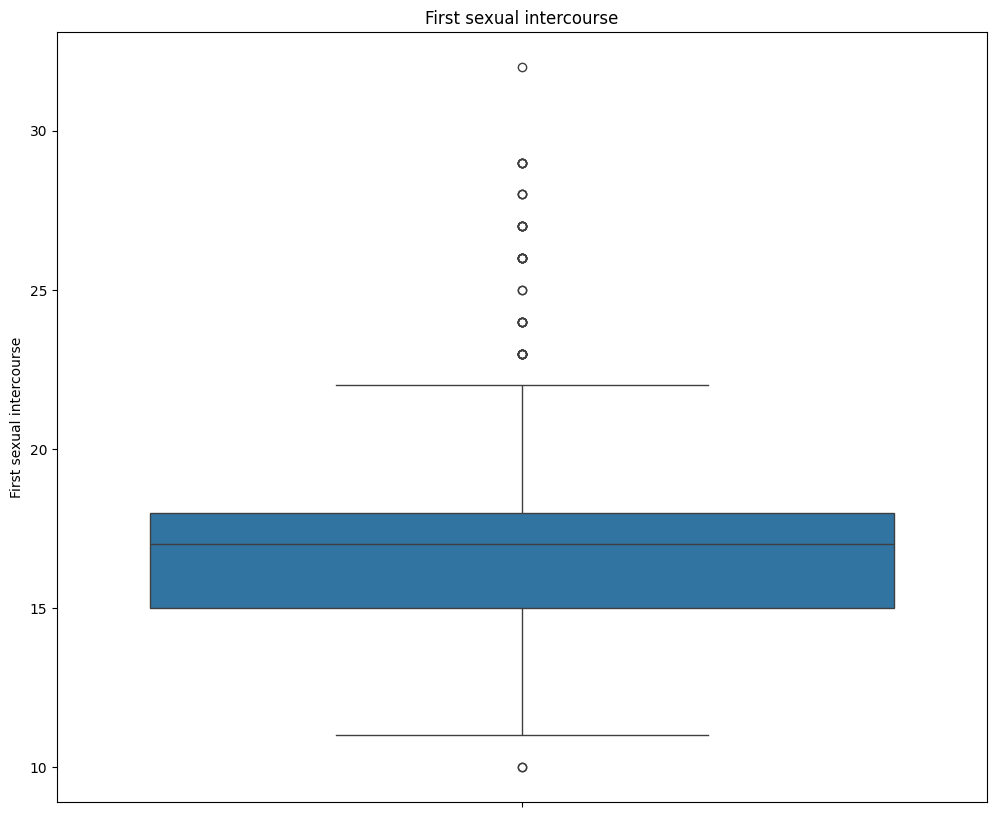

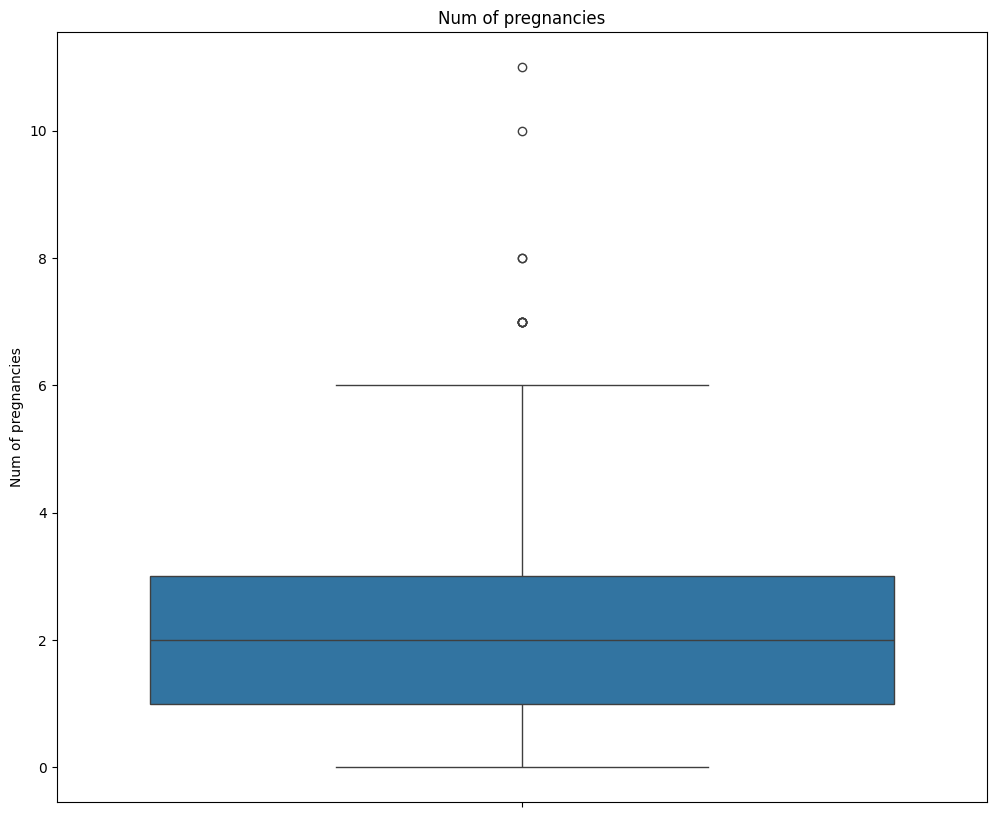

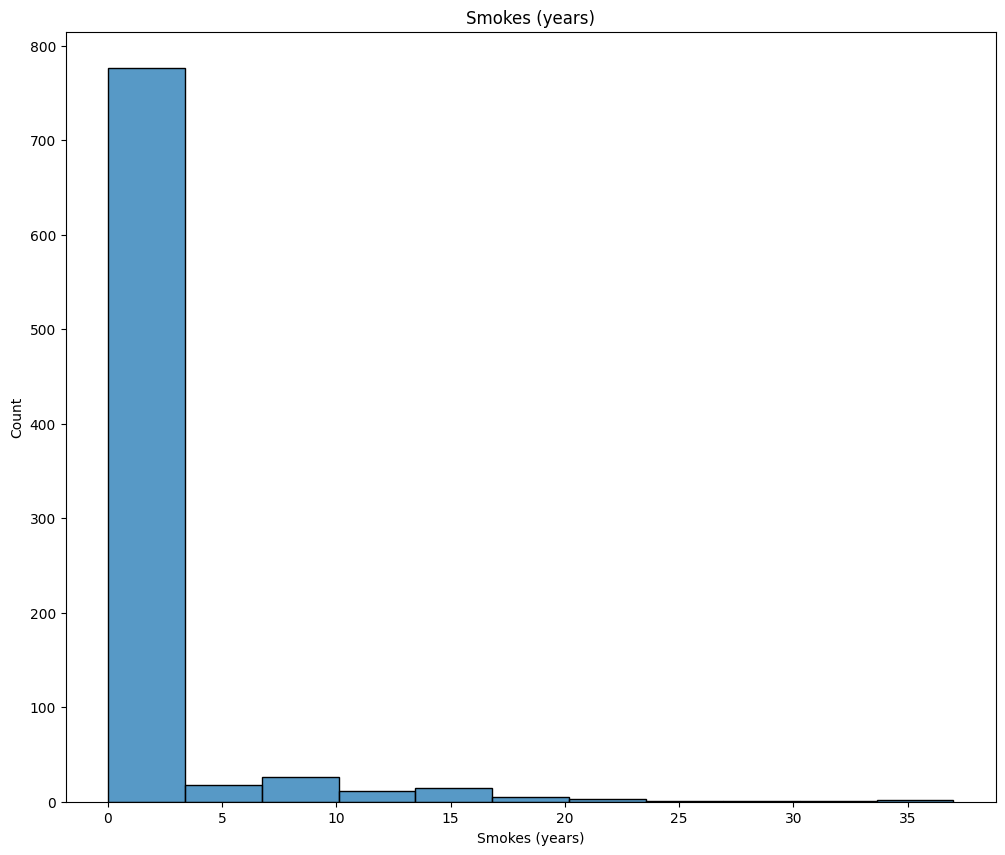

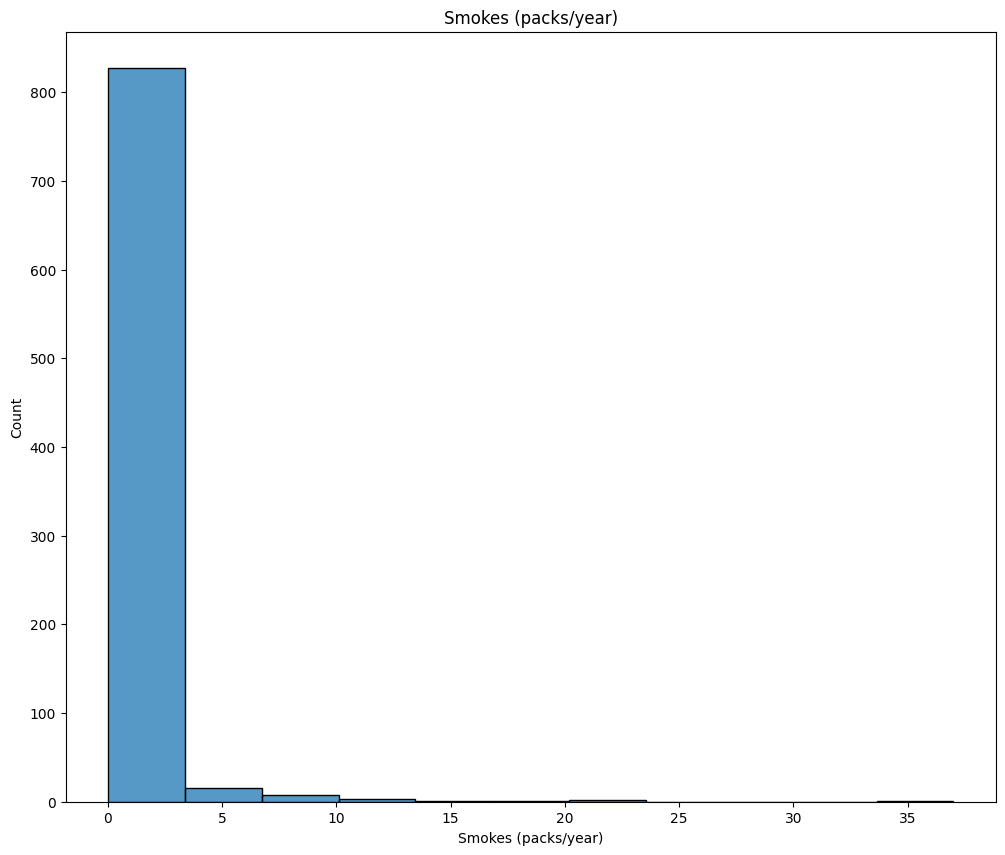

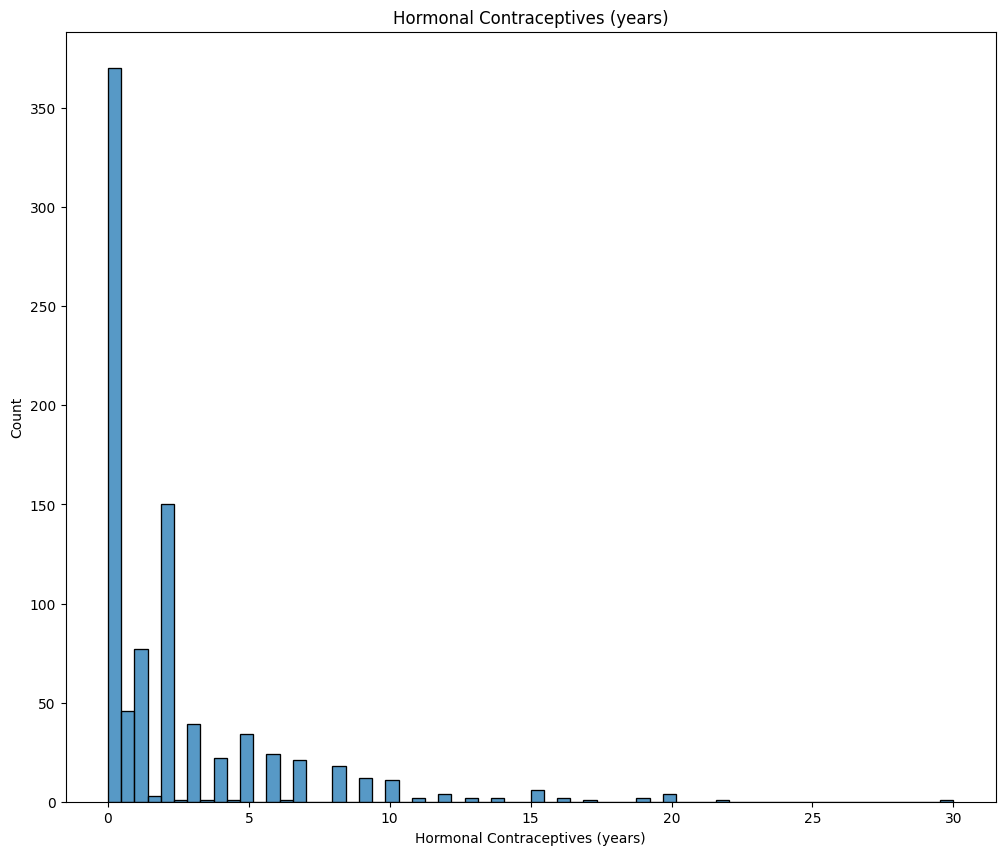

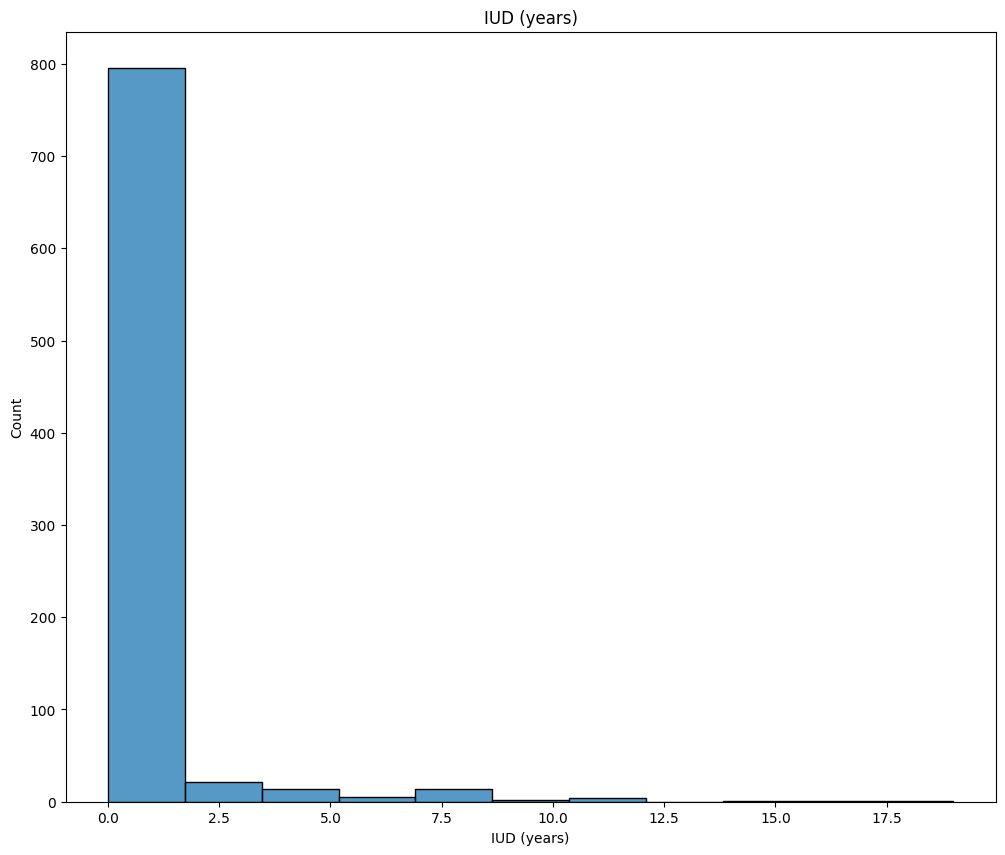

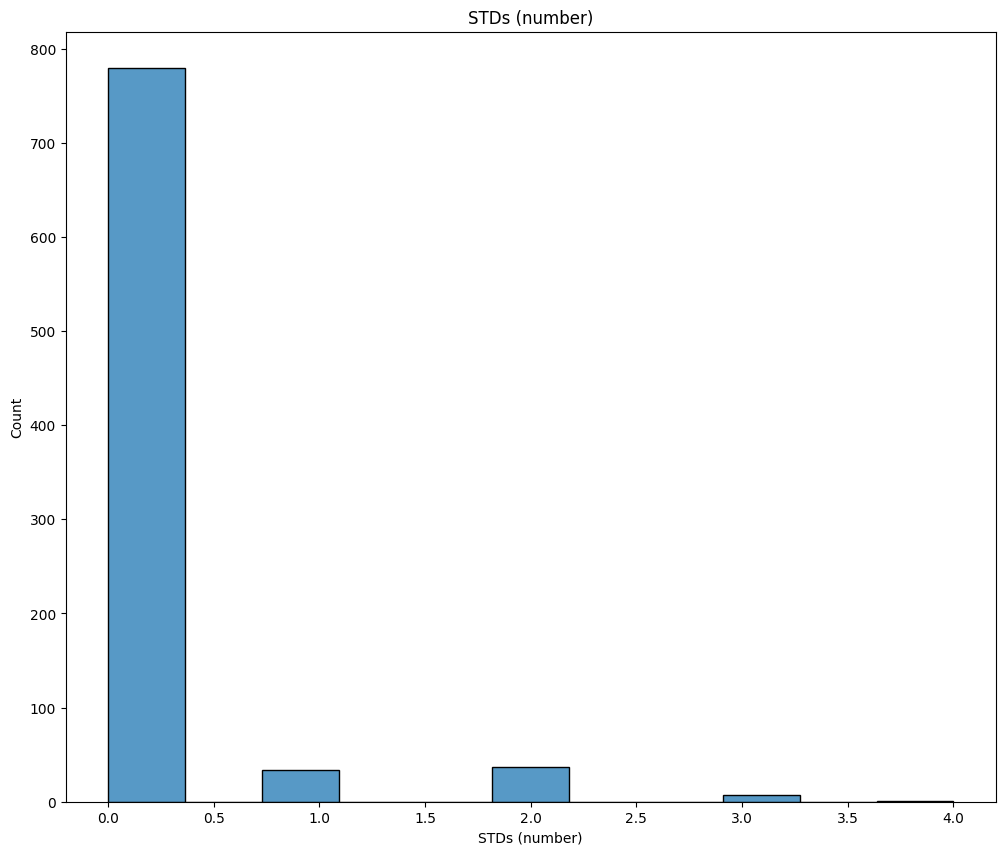

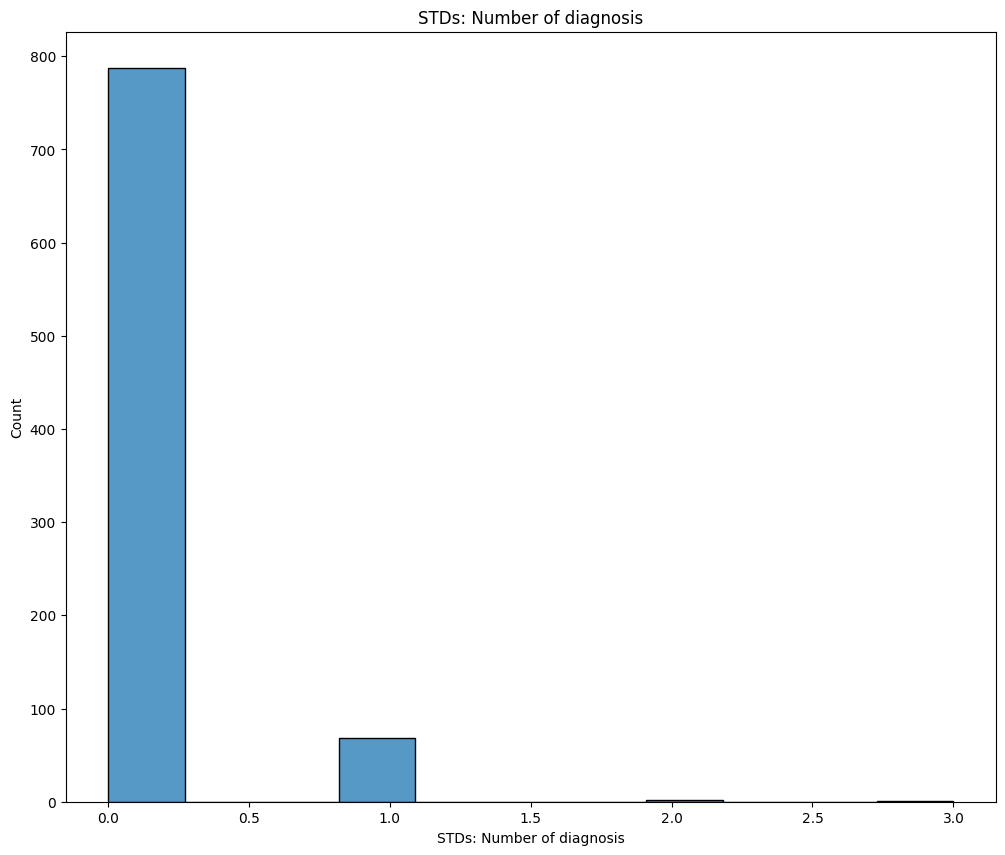

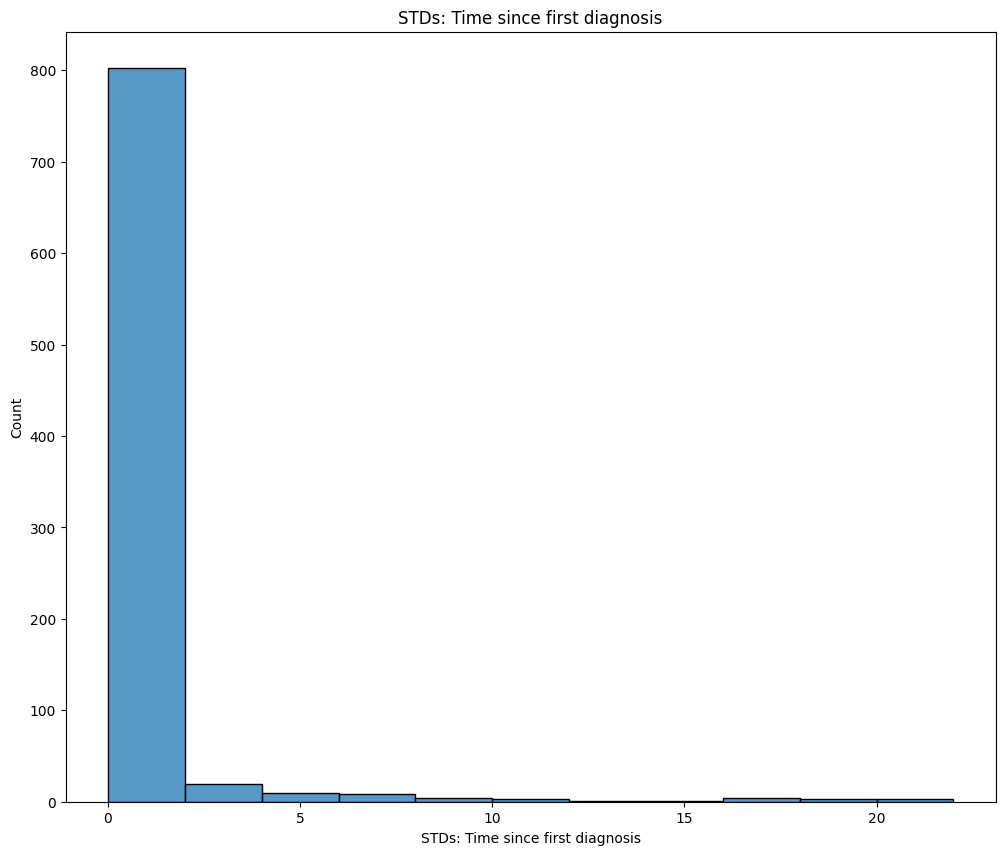

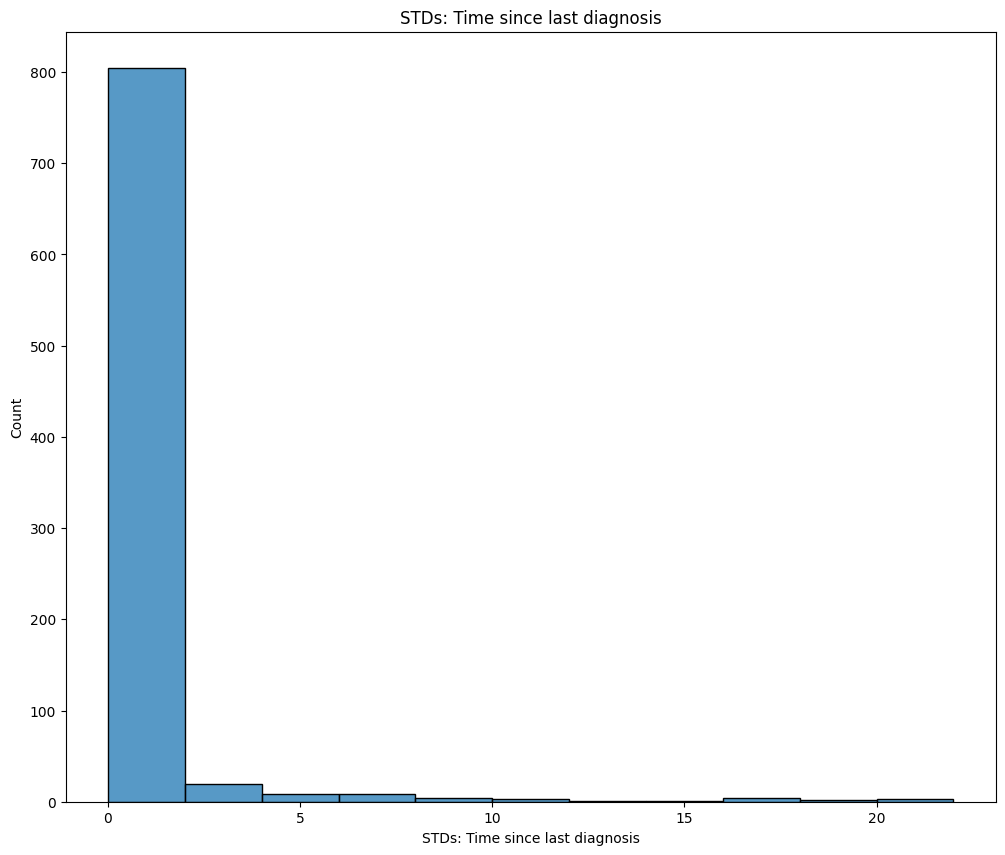

In [10]:
box_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']
for column in box_columns:
    plt.figure(figsize=(12,10))
    sb.boxplot(data=numerical[column])
    plt.title(column)
    plt.show()

hist_columns = ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
for column in hist_columns:
    plt.figure(figsize=(12,10))
    sb.histplot(data=numerical[column])
    plt.title(column)
    plt.show()

## Creación de matriz de correlación entre variables numéricas

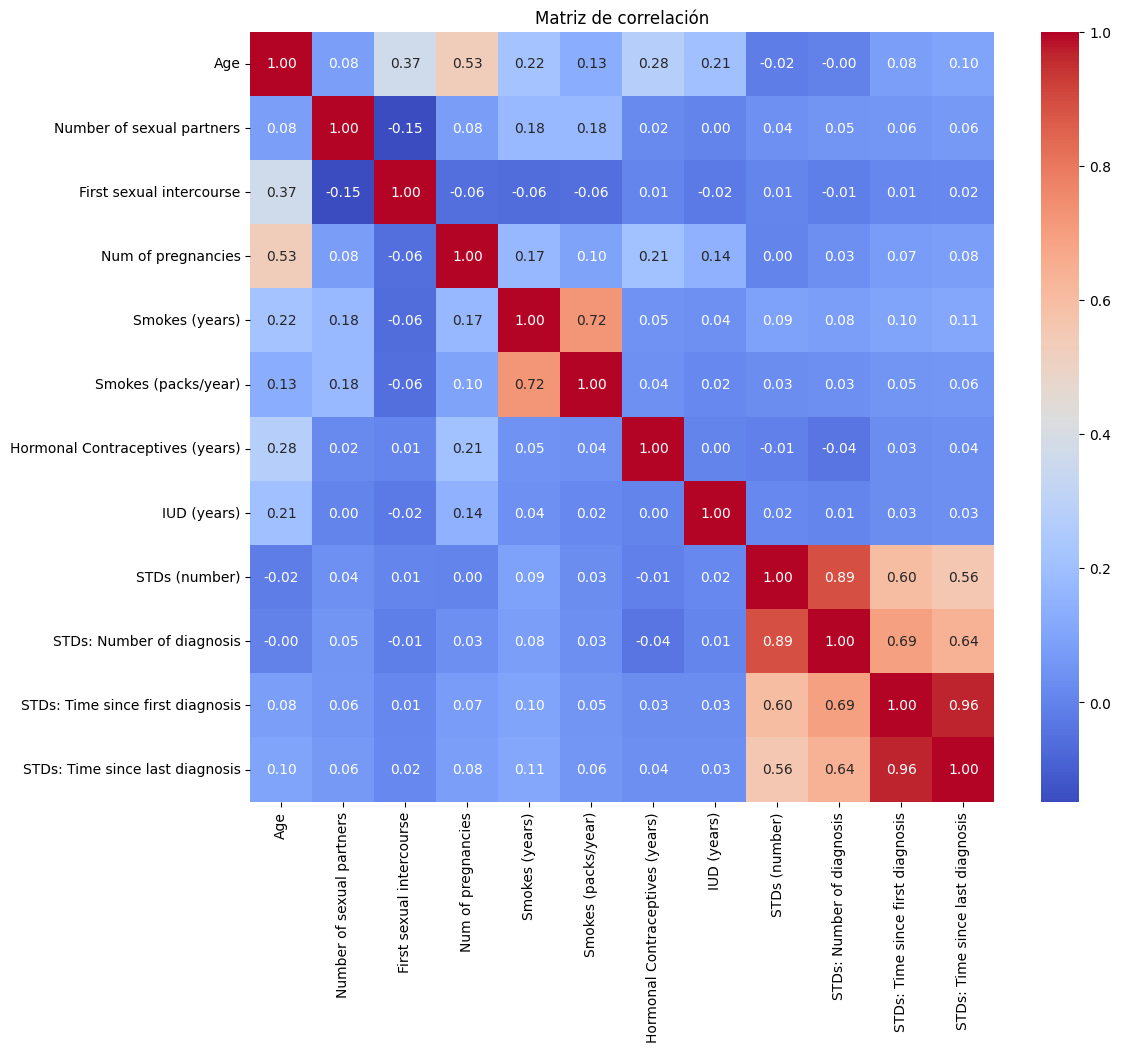

In [11]:
# Matriz de correlación
correlation_matrix = numerical.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

## Creación de las tablas de frecuencia para variables categóricas

In [12]:
import pandas as pd

def generar_tablas_frecuencia_con_estilo(data, columnas):
    styled_tables = {}
    for columna in columnas:
        frecuencia_univariada_norm = data[columna].value_counts(normalize=True).reset_index()
        frecuencia_univariada_norm.columns = [columna, 'Frequency']
        styled_table = frecuencia_univariada_norm.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [
                    ('background-color', 'lightblue'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            },
            {
                'selector': 'td',
                'props': [
                    ('background-color', 'lightyellow'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            }]
        ).set_properties(**{
            'text-align': 'center'
        }).set_caption(f"Tabla de Frecuencia Normalizada - {columna}")

        styled_tables[columna] = styled_table
    return styled_tables

# Lista de columnas para las cuales quieres generar las tablas de frecuencia
columnas = [
    "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "STDs:condylomatosis",
    "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis", "STDs:syphilis",
    "STDs:pelvic inflammatory disease", "STDs:genital herpes",
    "STDs:molluscum contagiosum", "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B",
    "STDs:HPV", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller",
    "Citology", "Biopsy"
]

print(len(columnas))

# Generar y almacenar las tablas de frecuencia con estilo
tablas_estilizadas = generar_tablas_frecuencia_con_estilo(data, columnas)

for fields in tablas_estilizadas:
    display(tablas_estilizadas[fields])

24


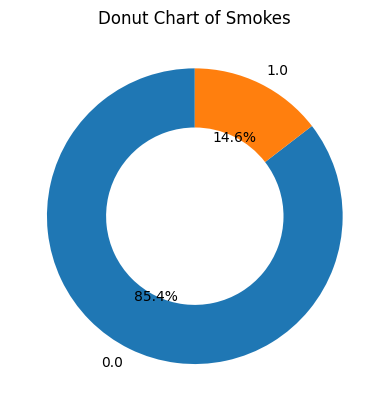

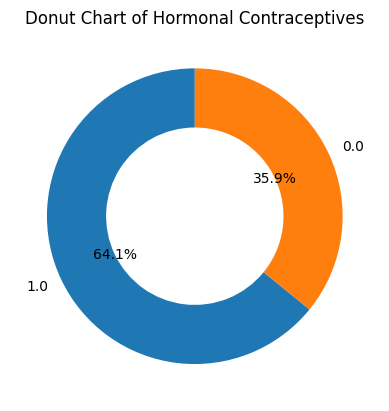

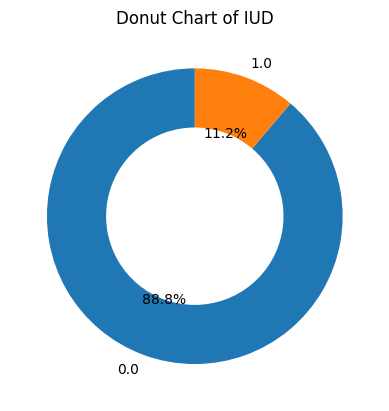

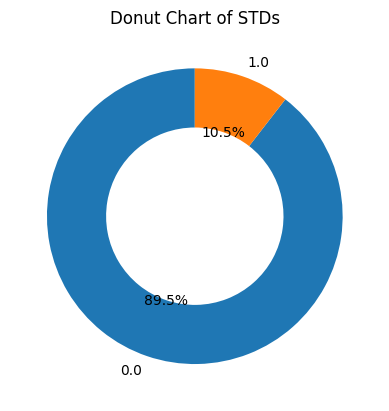

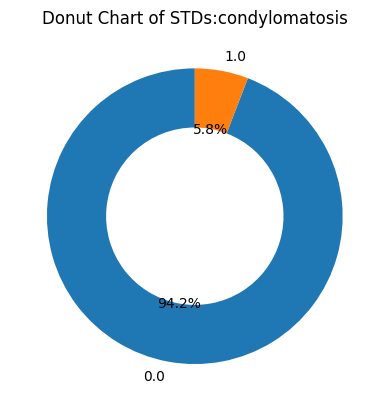

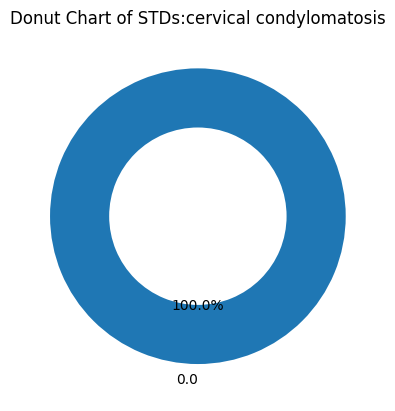

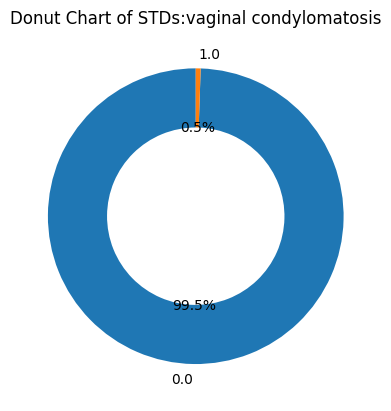

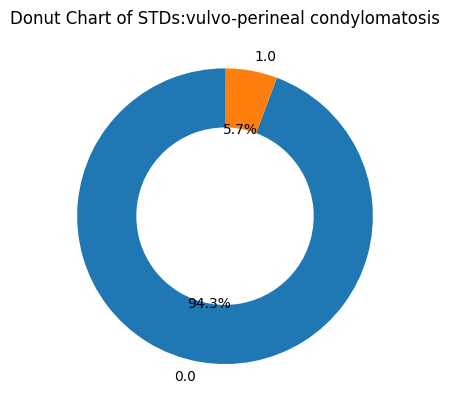

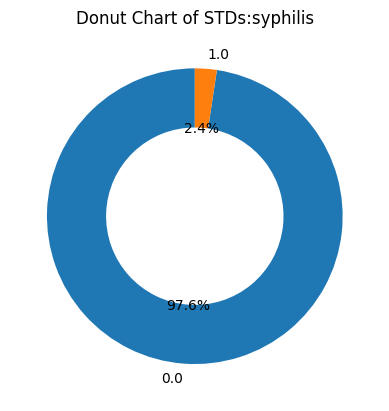

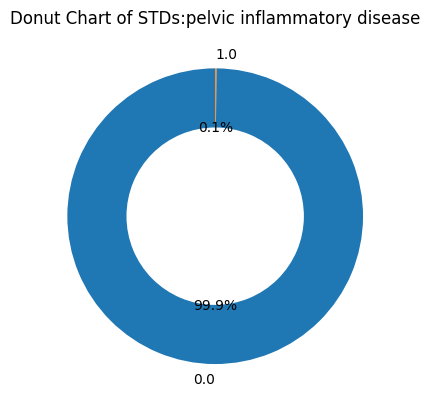

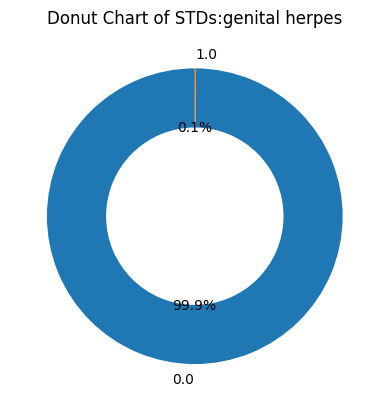

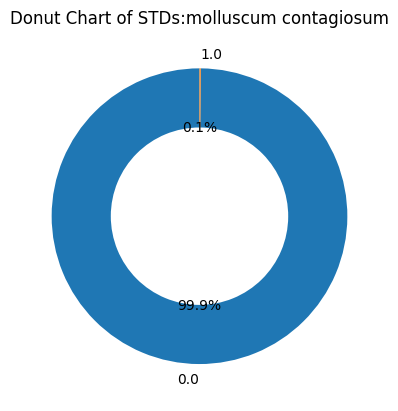

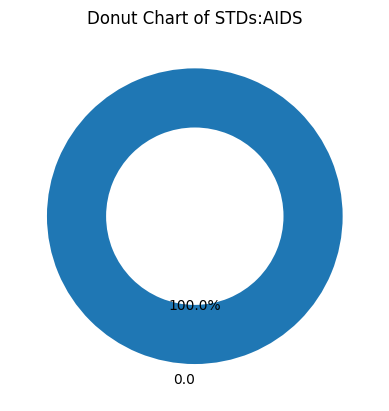

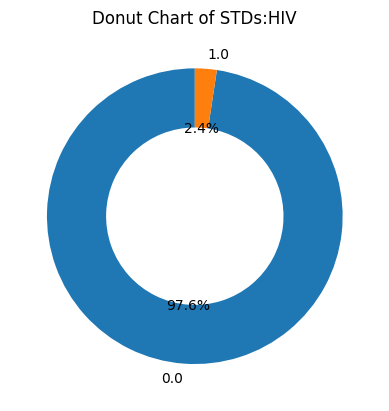

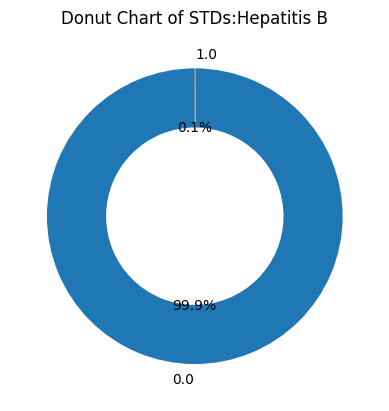

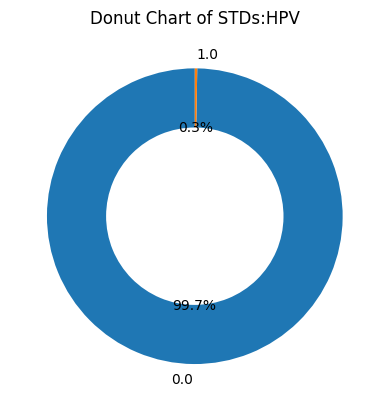

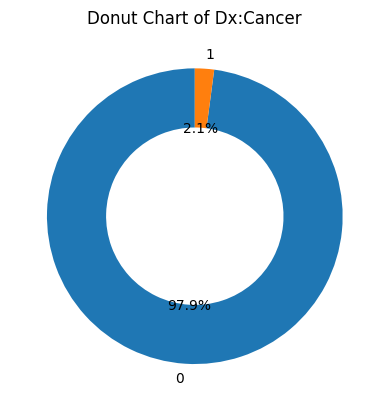

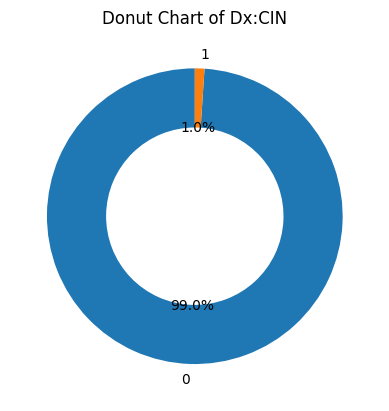

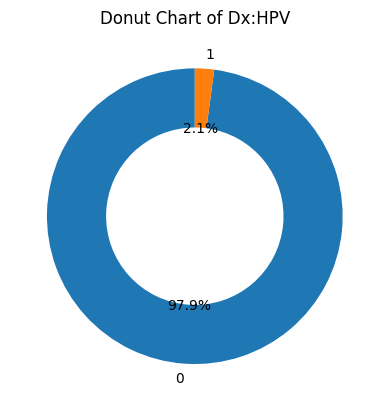

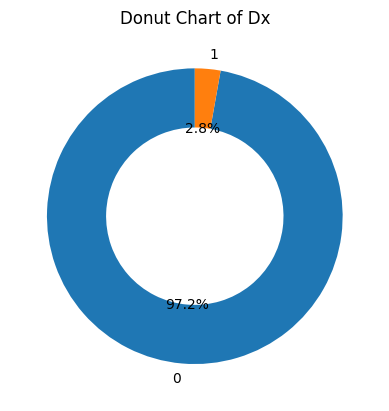

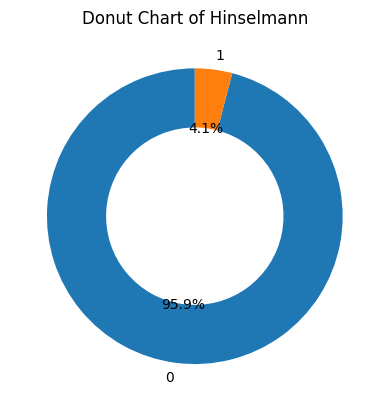

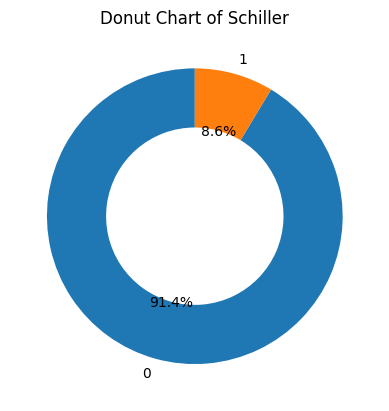

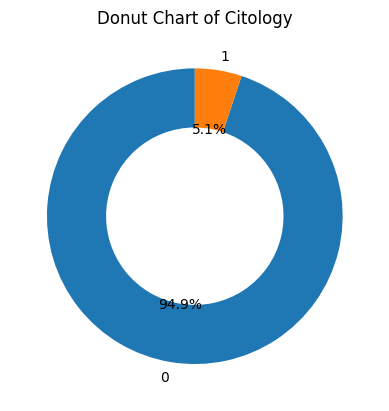

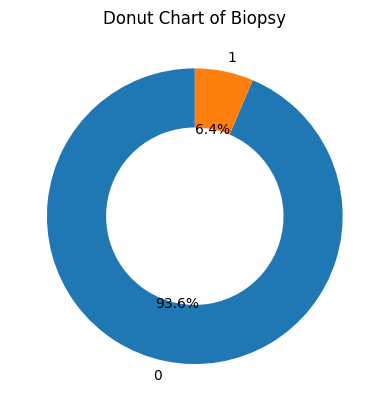

In [13]:
# Iterate over each column in the DataFrame
for column in categorical.columns:
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()
    
    # Get value counts of the column
    data = categorical[column].value_counts()
    
    # Plot donut chart
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    
    # Set title
    ax.set_title(f'Donut Chart of {column}')
    
    # Show plot
    plt.show()

In [14]:
for columna in categorical:
    frecuencia_univariada_norm = categorical[columna].value_counts(normalize=True).reset_index()
    frecuencia_univariada_norm.columns = [columna, 'Frequency']
    if frecuencia_univariada_norm['Frequency'][0] < 0.9:
        print(frecuencia_univariada_norm)


  Smokes  Frequency
0    0.0   0.854438
1    1.0   0.145562
  Hormonal Contraceptives  Frequency
0                     1.0   0.641333
1                     0.0   0.358667
   IUD  Frequency
0  0.0   0.887989
1  1.0   0.112011
  STDs  Frequency
0  0.0   0.895086
1  1.0   0.104914


In [15]:
for columna in categorical:
    frecuencia_univariada_norm = categorical[columna].value_counts(normalize=True).reset_index()
    frecuencia_univariada_norm.columns = [columna, 'Frequency']
    if frecuencia_univariada_norm['Frequency'][0] > 0.9:
        print(frecuencia_univariada_norm)

  STDs:condylomatosis  Frequency
0                 0.0   0.941567
1                 1.0   0.058433
  STDs:cervical condylomatosis  Frequency
0                          0.0        1.0
  STDs:vaginal condylomatosis  Frequency
0                         0.0   0.994688
1                         1.0   0.005312
  STDs:vulvo-perineal condylomatosis  Frequency
0                                0.0   0.942895
1                                1.0   0.057105
  STDs:syphilis  Frequency
0           0.0   0.976096
1           1.0   0.023904
  STDs:pelvic inflammatory disease  Frequency
0                              0.0   0.998672
1                              1.0   0.001328
  STDs:genital herpes  Frequency
0                 0.0   0.998672
1                 1.0   0.001328
  STDs:molluscum contagiosum  Frequency
0                        0.0   0.998672
1                        1.0   0.001328
  STDs:AIDS  Frequency
0       0.0        1.0
  STDs:HIV  Frequency
0      0.0   0.976096
1      1.0   0.023904


In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [17]:
chi_cuadrado, p_value = calculate_bartlett_sphericity(numerical.astype("float"))
chi_cuadrado, p_value

(5638.10998753798, 0.0)

In [18]:
kmo, kmo_modelo = calculate_kmo(numerical.astype("float"))
kmo_modelo

0.609342094115356

In [19]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(numerical.astype("float"))
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = numerical.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
)

Age  Number of sexual partners  First sexual intercourse  \
PC1   0.086976                   0.070712                  0.005228   
PC2   0.478088                   0.193223                  0.064169   
PC3  -0.441405                   0.256853                 -0.414186   
PC4   0.095520                  -0.345778                  0.704038   
PC5   0.023873                  -0.135301                  0.045371   
PC6   0.175703                   0.829919                  0.308571   
PC7   0.091597                  -0.230314                 -0.170720   
PC8   0.027749                   0.035347                  0.044488   
PC9   0.640492                  -0.091729                 -0.404161   
PC10 -0.329848                   0.048165                  0.190550   
PC11 -0.016400                  -0.001886                  0.024015   
PC12  0.002242                   0.004930                  0.001996   

      Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
PC1             0.085069        0.136894             0.097096   
PC2             0.417268        0.470297             0.438881   
PC3            -0.282578        0.409783             0.463171   
PC4            -0.342176        0.229118             0.262946   
PC5            -0.030329        0.054175             0.039750   
PC6            -0.060829       -0.151199            -0.156542   
PC7             0.605556        0.010818            -0.070634   
PC8             0.104178        0.015532            -0.027005   
PC9            -0.468486        0.260094            -0.324670   
PC10            0.139988        0.666391            -0.613517   
PC11           -0.020633        0.042129            -0.025788   
PC12            0.006673        0.002919            -0.002407   

      Hormonal Contraceptives (years)  IUD (years)  STDs (number)  \
PC1                          0.028610     0.035512       0.461502   
PC2                          0.248694     0.163277      -0.146135   
PC3                         -0.257706    -0.178256       0.019507   
PC4                         -0.210022    -0.302849       0.027003   
PC5                         -0.589285     0.790022       0.014903   
PC6                         -0.344008    -0.120784      -0.032019   
PC7                         -0.583589    -0.441250      -0.041599   
PC8                          0.063366    -0.002246       0.568903   
PC9                         -0.104109    -0.111660       0.026823   
PC10                         0.065325     0.049376      -0.002912   
PC11                         0.038893     0.015858      -0.660135   
PC12                        -0.001685     0.000393       0.037646   

      STDs: Number of diagnosis  STDs: Time since first diagnosis  \
PC1                    0.489667                          0.504643   
PC2                   -0.148237                         -0.079251   
PC3                    0.014305                         -0.053219   
PC4                    0.004228                         -0.011611   
PC5                    0.018771                         -0.027270   
PC6                   -0.009904                         -0.004241   
PC7                    0.024358                          0.002866   
PC8                    0.423909                         -0.454693   
PC9                    0.015489                         -0.022263   
PC10                  -0.072351                          0.005262   
PC11                   0.735399                          0.016352   
PC12                  -0.104883                          0.726486   

      STDs: Time since last diagnosis  
PC1                          0.492445  
PC2                         -0.062876  
PC3                         -0.061090  
PC4                         -0.014690  
PC5                         -0.030351  
PC6                          0.002824  
PC7                          0.002570  
PC8                         -0.519676  
PC9                         -0.026644  
PC10                         0.022779  
PC11 

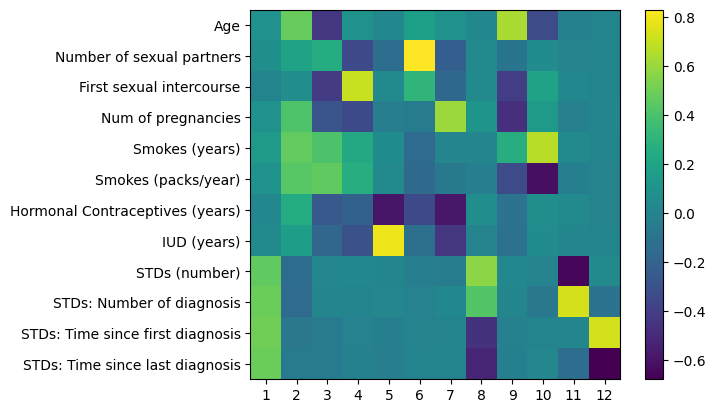

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(numerical.columns)), numerical.columns)
plt.xticks(range(len(numerical.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar()

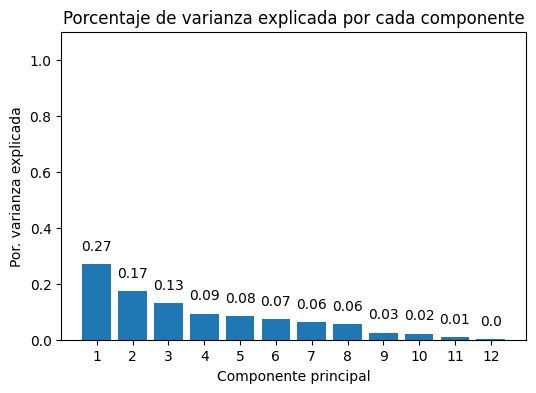

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(numerical.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0, 0.5, 'Por. varianza acumulada')

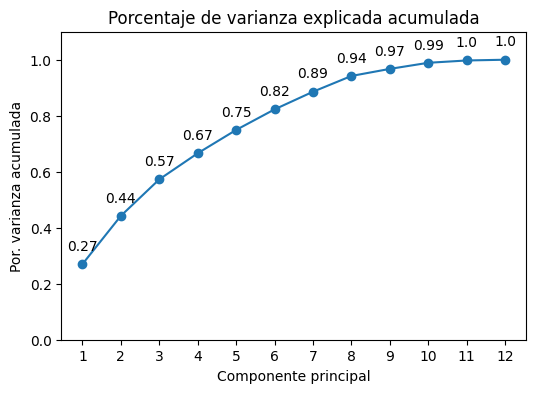

In [22]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(numerical.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(numerical.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [59]:
from apyori import apriori

In [61]:
print(categorical.shape)
# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 858):
    records.append([str(categorical.values[i,j]) for j in range(0, 24)]) 
records

(858, 24)


[['0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['1.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['0.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '

In [62]:
reglas_asociacion = apriori(records,min_support=0.2, min_confidence = 0.8)
reglas = list(reglas_asociacion)

In [64]:
len(reglas)

6

In [65]:
list(reglas)

[RelationRecord(items=frozenset({'0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'0.0'}), support=0.9778554778554779, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=0.9778554778554779, lift=1.0)]),
 RelationRecord(items=frozenset({'0.0', '0'}), support=0.9778554778554779, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0', '0'}), confidence=0.9778554778554779, lift=1.0), OrderedStatistic(items_base=frozenset({'0'}), items_add=frozenset({'0.0'}), confidence=0.9778554778554779, lift=1.0), OrderedStatistic(items_base=frozenset({'0.0'}), items_add=frozenset({'0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'1.0', '0'}), support=0.6783216783216783, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1.0'}), items_add=frozenset({'0'}), confidence=1.0, l